# Index
### 1. Merging single cell data with clinical data (label)



### 2. Train-Test Split: Making sure train and test sets have different subjects

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [6]:
#data

In [7]:
#pickle_file_path = '../preprocessed_data/count_matrix_microglia.pkl'
#data.to_pickle(pickle_file_path)

In [8]:

'''
for i in tqdm(os.listdir('../../preprocessed_data/inhibitory_neuron/split_chunks/')):
   
    print(i)
    #print(pd.read_csv('../../preprocessed_data/inhibitory_neuron/split_chunks/'+i,nrows=2,index_col=0))
    data = pd.read_csv('../../preprocessed_data/inhibitory_neuron/split_chunks/'+i,index_col=0)
    pickle_file_path = '../../preprocessed_data/'+i.split('.')[0]+'.pkl'
    data.to_pickle(pickle_file_path) 
'''

"\nfor i in tqdm(os.listdir('../../preprocessed_data/inhibitory_neuron/split_chunks/')):\n   \n    print(i)\n    #print(pd.read_csv('../../preprocessed_data/inhibitory_neuron/split_chunks/'+i,nrows=2,index_col=0))\n    data = pd.read_csv('../../preprocessed_data/inhibitory_neuron/split_chunks/'+i,index_col=0)\n    pickle_file_path = '../../preprocessed_data/'+i.split('.')[0]+'.pkl'\n    data.to_pickle(pickle_file_path) \n"

In [2]:
#pickle module used for serialization and deserialization
import pickle
# Load the DataFrame from the pickle file
#data = pd.read_csv('../preprocessed_data/mat.csv')
l = 0
for i in os.listdir('../../preprocessed_data/inhibitory_neuron/split_chunks/'):
    try:
        if i.split('.')[1] == 'pkl':
            print(i)
            pickle_file_path = '../../preprocessed_data/inhibitory_neuron/split_chunks/' + i
            if l == 0: 
                data = pd.read_pickle(pickle_file_path)
                # to load data in the RAM (not possible to load all data once)
                selected_columns = np.random.choice(data.columns, size=int(len(data.columns) *0.5), replace=False)
                data = data[selected_columns]
            else:
                df = pd.read_pickle(pickle_file_path)
                df_selected = df[selected_columns] # selected columns comimg from first time loaded data
                data = pd.concat([data,df_selected],axis = 0)
            
            print("Pickle file has been loaded into a DataFrame:")
            l = l + 1       
    except:
        continue

inhibitory_neurons_mat_chunk_2.pkl
Pickle file has been loaded into a DataFrame:
inhibitory_neurons_mat_chunk_3.pkl
Pickle file has been loaded into a DataFrame:
inhibitory_neurons_mat_chunk_13.pkl
Pickle file has been loaded into a DataFrame:
inhibitory_neurons_mat_chunk_9.pkl
Pickle file has been loaded into a DataFrame:
inhibitory_neurons_mat_chunk_1.pkl
Pickle file has been loaded into a DataFrame:
inhibitory_neurons_mat_chunk_5.pkl
Pickle file has been loaded into a DataFrame:
inhibitory_neurons_mat_chunk_6.pkl
Pickle file has been loaded into a DataFrame:
inhibitory_neurons_mat_chunk_16.pkl
Pickle file has been loaded into a DataFrame:
inhibitory_neurons_mat_chunk_11.pkl
Pickle file has been loaded into a DataFrame:
inhibitory_neurons_mat_chunk_14.pkl
Pickle file has been loaded into a DataFrame:
inhibitory_neurons_mat_chunk_7.pkl
Pickle file has been loaded into a DataFrame:
inhibitory_neurons_mat_chunk_4.pkl
Pickle file has been loaded into a DataFrame:
inhibitory_neurons_mat_c

In [3]:
data
#columns represent cells, rows represent genes

,CTATCTAAGCGTGCTC.2.14,AGACACTTCAATCCGA.9.2,AGACACTCACAATGAA.1.9,GTCTAGACATGCGTGC.31.11,CATCGAATCCCATTAT.32.1,TCATTACCATCTCAAG.19.10,TGAGCGCCACCAGTAT.7.14,TAGAGTCAGTAAGCAT.8.7,GAGGGATCACATTGTG.11.3,GTGCTTCAGGGAGAAT.27.11,...,GATGAAACAGTCGATT.38.1,TCCTCTTTCCACCTGT.6.4,ACGCAGCTCTGTCTAT.39.1,AGCGTATTCCTTGCCA.1.1,GTAGATCAGTTTGTCG.22.2,CATGGATGTATGTCCA.16.4,AAAGGTAGTGGACCAA.26.10,AAAGTGAAGGAAAGGT.16.11,GCGAGAATCGCTAATG.16.7,TCCGGGATCTAGTTCT.21.9
KRTCAP2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL713999.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRIM46,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
MUC1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC234582.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC233755.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC240274.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
AC213203.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(33538, 164849)

In [7]:
data.describe

<bound method NDFrame.describe of             ATCCTATGTGGCAACA.31.6  AGTAGTCGTTGGAGGT.9.3  \
KRTCAP2                         0                     0   
AL713999.1                      0                     0   
TRIM46                          0                     0   
MUC1                            0                     0   
AC234582.1                      0                     0   
...                           ...                   ...   
AC233755.2                      0                     0   
AC233755.1                      0                     0   
AC240274.1                      0                     0   
AC213203.1                      0                     0   
FAM231C                         0                     0   

            TCCTCTTGTTGGGTTT.6.12  AGAACAAAGTGATAGT.16.14  \
KRTCAP2                         0                       0   
AL713999.1                      0                       0   
TRIM46                          0                       1   
MUC1         

In [6]:
row_sum = data.sum(axis=1)

print(row_sum)
#total number of times the gene is expressed for all cells


KRTCAP2         739
AL713999.1     1882
TRIM46        25200
MUC1             54
AC234582.1     1545
              ...  
AC233755.2        0
AC233755.1        0
AC240274.1    10404
AC213203.1        1
FAM231C           3
Length: 33538, dtype: int64


In [7]:
col_sum = data.sum(axis=0)
col_sum
#total gene count for each cell

CTATCTAAGCGTGCTC.2.14      8627
AGACACTTCAATCCGA.9.2      27682
AGACACTCACAATGAA.1.9       9713
GTCTAGACATGCGTGC.31.11    10470
CATCGAATCCCATTAT.32.1      3153
                          ...  
CATGGATGTATGTCCA.16.4      1261
AAAGGTAGTGGACCAA.26.10    20264
AAAGTGAAGGAAAGGT.16.11    12329
GCGAGAATCGCTAATG.16.7     19212
TCCGGGATCTAGTTCT.21.9     14407
Length: 164849, dtype: int64

In [8]:
clinical_data = pd.read_csv('/12tb_dsk1/danish/preprocessed_data/clinical/clinical_single_cell.csv')

In [9]:
clinical_data.head()

,individualID,individualIdSource,sex,ethnicity,pmi_df2,subject,projid,Study,msex,educ,...,age_death,cts_mmse30_first_ad_dx,cts_mmse30_lv,braaksc,ceradsc,cogdx,dcfdx_lv,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD
0,R2626559,Rush,male,NaN,6.500000,ROSMAP-45310,1211411,ROS,1.0,12.0,...,85.549624,NaN,24.0,1.0,4.0,4.0,4.0,AD,No AD,False
1,R9936070,Rush,male,NaN,7.016667,ROSMAP-34387,2899847,MAP,1.0,14.0,...,74.450376,NaN,27.0,2.0,2.0,3.0,3.0,False,False,False
2,R2367199,Rush,male,NaN,4.333333,ROSMAP-69520,3713990,MAP,1.0,12.0,...,87.928816,NaN,30.0,4.0,2.0,1.0,1.0,NCI,False,False
3,R9891381,Rush,female,NaN,6.916667,ROSMAP-53306,3889845,MAP,0.0,13.0,...,90.000000,NaN,22.0,2.0,1.0,2.0,2.0,False,AD,False
4,R9033345,Rush,male,NaN,4.166667,ROSMAP-79585,6107196,MAP,1.0,15.0,...,90.000000,NaN,22.0,5.0,1.0,4.0,4.0,AD,AD,AD_with_Plaques


In [10]:
clinical_data.shape
#we have 514 subjects. there are 24 columns that give the characteristics of these subjects and whether or not they are in the AD group or control group

(514, 24)

In [11]:
single_cell_metadata = pd.read_csv('../../preprocessed_data/inhibitory_neuron/metadata_inhibitory_neurons.csv', index_col = 0)

In [12]:
single_cell_metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,log10GenesPerUMI,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,individualID,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD,train_test_clinical_and_pathological
cell_id,,,,,,,,,,,,,,
AAACCCAAGAAATCCA.12.9,ROSMAP,13490,4276,0.237213,0.289103,0.879183,Inh L3-5 SST MAFB,ROSMAP-65967,yes,R3857147,AD,AD,AD_with_Plaques,train
AAACCCAAGAACGCGT.6.6,ROSMAP,2651,1533,8.185590,0.452659,0.930517,Inh L3-5 SST MAFB,ROSMAP-90639,yes,R7090624,NCI,AD,False,NaN
AAACCCAAGAACTGAT.10.12,ROSMAP,6550,2764,4.809160,0.274809,0.901814,Inh LAMP5 RELN,ROSMAP-57958,yes,R2347173,NCI,AD,False,NaN
AAACCCAAGAAGCGGG.31.8,ROSMAP,11658,4377,5.738549,0.394579,0.895381,Inh VIP CLSTN2,ROSMAP-40761,yes,R1287407,False,AD,False,NaN
AAACCCAAGAATCCCT.14.8,ROSMAP,15297,4688,0.921749,0.307250,0.877260,Inh VIP CLSTN2,ROSMAP-68841,yes,R3757880,NCI,AD,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCTTAGCAG.7.9,ROSMAP,9309,3459,2.062520,0.225588,0.891670,Inh VIP TSHZ2,ROSMAP-77886,no,R2554598,NCI,False,False,NaN
TTTGTTGTCTTCCCGA.28.6,ROSMAP,22844,5507,0.153213,0.358956,0.858250,Inh PVALB SULF1,ROSMAP-38931,no,R6292415,NCI,No AD,NCI_with_No_Plaques,train
TTTGTTGTCTTCGACC.3.13,ROSMAP,16770,5431,2.098986,0.679785,0.884093,Inh CUX2 MSR1,ROSMAP-53472,yes,R3863249,False,False,False,NaN


In [13]:
try:
    single_cell_metadata['cell_id'] = single_cell_metadata['cell_id'].str.replace('-', '.')
except:
    print('probably not needed to do')
single_cell_metadata.head()

probably not needed to do


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,log10GenesPerUMI,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,individualID,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD,train_test_clinical_and_pathological
cell_id,,,,,,,,,,,,,,
AAACCCAAGAAATCCA.12.9,ROSMAP,13490,4276,0.237213,0.289103,0.879183,Inh L3-5 SST MAFB,ROSMAP-65967,yes,R3857147,AD,AD,AD_with_Plaques,train
AAACCCAAGAACGCGT.6.6,ROSMAP,2651,1533,8.185590,0.452659,0.930517,Inh L3-5 SST MAFB,ROSMAP-90639,yes,R7090624,NCI,AD,False,NaN
AAACCCAAGAACTGAT.10.12,ROSMAP,6550,2764,4.809160,0.274809,0.901814,Inh LAMP5 RELN,ROSMAP-57958,yes,R2347173,NCI,AD,False,NaN
AAACCCAAGAAGCGGG.31.8,ROSMAP,11658,4377,5.738549,0.394579,0.895381,Inh VIP CLSTN2,ROSMAP-40761,yes,R1287407,False,AD,False,NaN
AAACCCAAGAATCCCT.14.8,ROSMAP,15297,4688,0.921749,0.307250,0.877260,Inh VIP CLSTN2,ROSMAP-68841,yes,R3757880,NCI,AD,False,NaN


In [14]:
single_cell_metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,log10GenesPerUMI,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,individualID,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD,train_test_clinical_and_pathological
cell_id,,,,,,,,,,,,,,
AAACCCAAGAAATCCA.12.9,ROSMAP,13490,4276,0.237213,0.289103,0.879183,Inh L3-5 SST MAFB,ROSMAP-65967,yes,R3857147,AD,AD,AD_with_Plaques,train
AAACCCAAGAACGCGT.6.6,ROSMAP,2651,1533,8.185590,0.452659,0.930517,Inh L3-5 SST MAFB,ROSMAP-90639,yes,R7090624,NCI,AD,False,NaN
AAACCCAAGAACTGAT.10.12,ROSMAP,6550,2764,4.809160,0.274809,0.901814,Inh LAMP5 RELN,ROSMAP-57958,yes,R2347173,NCI,AD,False,NaN
AAACCCAAGAAGCGGG.31.8,ROSMAP,11658,4377,5.738549,0.394579,0.895381,Inh VIP CLSTN2,ROSMAP-40761,yes,R1287407,False,AD,False,NaN
AAACCCAAGAATCCCT.14.8,ROSMAP,15297,4688,0.921749,0.307250,0.877260,Inh VIP CLSTN2,ROSMAP-68841,yes,R3757880,NCI,AD,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCTTAGCAG.7.9,ROSMAP,9309,3459,2.062520,0.225588,0.891670,Inh VIP TSHZ2,ROSMAP-77886,no,R2554598,NCI,False,False,NaN
TTTGTTGTCTTCCCGA.28.6,ROSMAP,22844,5507,0.153213,0.358956,0.858250,Inh PVALB SULF1,ROSMAP-38931,no,R6292415,NCI,No AD,NCI_with_No_Plaques,train
TTTGTTGTCTTCGACC.3.13,ROSMAP,16770,5431,2.098986,0.679785,0.884093,Inh CUX2 MSR1,ROSMAP-53472,yes,R3863249,False,False,False,NaN


In [15]:
single_cell_metadata = single_cell_metadata.reset_index()

In [16]:
print(single_cell_metadata.columns)

Index(['cell_id', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt',
       'percent.rb', 'log10GenesPerUMI', 'cell_type_high_resolution',
       'subject', 'Pathologic_diagnosis_of_AD', 'individualID',
       'clinical_diagnosis', 'pathological_diagnosis',
       'clinical_pathological_AD', 'train_test_clinical_and_pathological'],
      dtype='object')


In [17]:
set(data.columns) - set(single_cell_metadata['cell_id'])

set()

In [18]:
set(single_cell_metadata['cell_id']) - set(data.columns)

{'TTGACTTAGGCTAGGT.17.1',
 'AGATCCAAGCATCGAG.15.2',
 'TCATCCGCAGCTGGTC.26.8',
 'GGCTGTGTCATTCTTG.31.8',
 'AGGTCTAAGAAGAGCA.23.6',
 'TTTACTGAGCTGTACT.19.5',
 'TCAGCAAGTAGCTGCC.11.8',
 'GTGAAGGTCTGTACGA.23.1',
 'GATCATGAGTGATTCC.10.11',
 'GACGTTAAGCCTGAAG.29.2',
 'GCACGGTAGACCATTC.7.11',
 'AATGAAGCATGTGTCA.26.4',
 'TAGACTGCATCCTGTC.15.11',
 'TTGGATGTCGTCGGGT.13.11',
 'GATCACACATCAGCTA.28.4',
 'GAGACCCTCATTGCCC.16.2',
 'GTCATGATCTGCTCTG.16.11',
 'GTGTAACCAAATGGCG.23.2',
 'CATTGCCTCATAGCAC.28.2',
 'CTCAGGGAGATACATG.4.14',
 'GTGGTTAGTGTTGACT.26.6',
 'ATAGGCTAGACAACAT.5.7',
 'CTTCTCTCACGTCATA.32.11',
 'TCCTGCATCCCTGTTG.14.14',
 'AGCCACGCAGTATACC.7.9',
 'GATGTTGTCAAGAATG.31.9',
 'ACAGAAACAATGTGGG.21.11',
 'TAAGCGTGTGCCTGAC.4.5',
 'CATGACAAGGGTGTTG.4.1',
 'ATACCGAAGTTGAAGT.18.4',
 'TGCTCCATCGAACGGA.26.10',
 'TAACCAGCACGTAGTT.31.9',
 'TGAGCATCACGAGGAT.27.11',
 'CCTAACCGTTCTCCTG.24.3',
 'ATCACGATCCGTAATG.24.7',
 'CTATCCGCATAGCTGT.13.11',
 'CATCAAGCAAAGCTCT.6.12',
 'TAACTTCGTTCCGCAG.12.7',
 'GAGT

In [19]:
clinical_data

,individualID,individualIdSource,sex,ethnicity,pmi_df2,subject,projid,Study,msex,educ,...,age_death,cts_mmse30_first_ad_dx,cts_mmse30_lv,braaksc,ceradsc,cogdx,dcfdx_lv,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD
0,R2626559,Rush,male,NaN,6.500000,ROSMAP-45310,1211411,ROS,1.0,12.0,...,85.549624,NaN,24.0,1.0,4.0,4.0,4.0,AD,No AD,False
1,R9936070,Rush,male,NaN,7.016667,ROSMAP-34387,2899847,MAP,1.0,14.0,...,74.450376,NaN,27.0,2.0,2.0,3.0,3.0,False,False,False
2,R2367199,Rush,male,NaN,4.333333,ROSMAP-69520,3713990,MAP,1.0,12.0,...,87.928816,NaN,30.0,4.0,2.0,1.0,1.0,NCI,False,False
3,R9891381,Rush,female,NaN,6.916667,ROSMAP-53306,3889845,MAP,0.0,13.0,...,90.000000,NaN,22.0,2.0,1.0,2.0,2.0,False,AD,False
4,R9033345,Rush,male,NaN,4.166667,ROSMAP-79585,6107196,MAP,1.0,15.0,...,90.000000,NaN,22.0,5.0,1.0,4.0,4.0,AD,AD,AD_with_Plaques
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,R9738414,Rush,female,NaN,9.250000,ROSMAP-90149,20976799,ROS,0.0,18.0,...,90.000000,NaN,19.0,2.0,4.0,2.0,2.0,False,No AD,False
510,R7737688,Rush,female,NaN,7.000000,NaN,69866926,MAP,0.0,13.0,...,84.104038,20.0,3.0,6.0,1.0,4.0,4.0,AD,AD,AD_with_Plaques
511,R7844746,Rush,male,NaN,0.866667,NaN,29286432,ROS,1.0,24.0,...,90.000000,NaN,29.0,5.0,2.0,2.0,2.0,False,False,False
512,R6692433,Rush,female,NaN,6.583333,NaN,48331728,MAP,0.0,14.0,...,82.715948,NaN,27.0,2.0,4.0,1.0,1.0,NCI,No AD,NCI_with_No_Plaques


In [20]:
len(set(single_cell_metadata.subject))


423

In [21]:
set(clinical_data.subject)-set(single_cell_metadata.subject)

{'ROSMAP-19345', 'ROSMAP-60910', 'ROSMAP-61723', 'ROSMAP-67297', nan}

In [22]:
single_cell_metadata = pd.merge(single_cell_metadata, clinical_data[['subject', 'individualID','clinical_diagnosis','pathological_diagnosis','clinical_pathological_AD']], on='subject', how='left')


In [23]:
single_cell_metadata.shape
#number of rows increased from 329000 something to this. means that there can be duplicate rows in the clinical data dataset

(424431, 19)

In [24]:
single_cell_metadata

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,log10GenesPerUMI,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,individualID_x,clinical_diagnosis_x,pathological_diagnosis_x,clinical_pathological_AD_x,train_test_clinical_and_pathological,individualID_y,clinical_diagnosis_y,pathological_diagnosis_y,clinical_pathological_AD_y
0,AAACCCAAGAAATCCA.12.9,ROSMAP,13490,4276,0.237213,0.289103,0.879183,Inh L3-5 SST MAFB,ROSMAP-65967,yes,R3857147,AD,AD,AD_with_Plaques,train,R3857147,AD,AD,AD_with_Plaques
1,AAACCCAAGAACGCGT.6.6,ROSMAP,2651,1533,8.185590,0.452659,0.930517,Inh L3-5 SST MAFB,ROSMAP-90639,yes,R7090624,NCI,AD,False,NaN,R7090624,NCI,AD,False
2,AAACCCAAGAACTGAT.10.12,ROSMAP,6550,2764,4.809160,0.274809,0.901814,Inh LAMP5 RELN,ROSMAP-57958,yes,R2347173,NCI,AD,False,NaN,R2347173,NCI,AD,False
3,AAACCCAAGAAGCGGG.31.8,ROSMAP,11658,4377,5.738549,0.394579,0.895381,Inh VIP CLSTN2,ROSMAP-40761,yes,R1287407,False,AD,False,NaN,R1287407,False,AD,False
4,AAACCCAAGAATCCCT.14.8,ROSMAP,15297,4688,0.921749,0.307250,0.877260,Inh VIP CLSTN2,ROSMAP-68841,yes,R3757880,NCI,AD,False,NaN,R3757880,NCI,AD,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424426,TTTGTTGTCTTCCCGA.28.6,ROSMAP,22844,5507,0.153213,0.358956,0.858250,Inh PVALB SULF1,ROSMAP-38931,no,R6292415,NCI,No AD,NCI_with_No_Plaques,train,R6292415,NCI,No AD,NCI_with_No_Plaques
424427,TTTGTTGTCTTCGACC.3.13,ROSMAP,16770,5431,2.098986,0.679785,0.884093,Inh CUX2 MSR1,ROSMAP-53472,yes,R3863249,False,False,False,NaN,R3863249,False,False,False
424428,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,R5221394,NCI,No AD,NCI_with_No_Plaques,test,R5221394,NCI,No AD,NCI_with_No_Plaques
424429,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,R5221394,NCI,No AD,NCI_with_No_Plaques,test,R5221394,NCI,No AD,NCI_with_No_Plaques


In [25]:
single_cell_metadata= single_cell_metadata.drop_duplicates()
single_cell_metadata
#we have dropped duplicates and now we are back to the original shape

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,log10GenesPerUMI,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,individualID_x,clinical_diagnosis_x,pathological_diagnosis_x,clinical_pathological_AD_x,train_test_clinical_and_pathological,individualID_y,clinical_diagnosis_y,pathological_diagnosis_y,clinical_pathological_AD_y
0,AAACCCAAGAAATCCA.12.9,ROSMAP,13490,4276,0.237213,0.289103,0.879183,Inh L3-5 SST MAFB,ROSMAP-65967,yes,R3857147,AD,AD,AD_with_Plaques,train,R3857147,AD,AD,AD_with_Plaques
1,AAACCCAAGAACGCGT.6.6,ROSMAP,2651,1533,8.185590,0.452659,0.930517,Inh L3-5 SST MAFB,ROSMAP-90639,yes,R7090624,NCI,AD,False,NaN,R7090624,NCI,AD,False
2,AAACCCAAGAACTGAT.10.12,ROSMAP,6550,2764,4.809160,0.274809,0.901814,Inh LAMP5 RELN,ROSMAP-57958,yes,R2347173,NCI,AD,False,NaN,R2347173,NCI,AD,False
3,AAACCCAAGAAGCGGG.31.8,ROSMAP,11658,4377,5.738549,0.394579,0.895381,Inh VIP CLSTN2,ROSMAP-40761,yes,R1287407,False,AD,False,NaN,R1287407,False,AD,False
4,AAACCCAAGAATCCCT.14.8,ROSMAP,15297,4688,0.921749,0.307250,0.877260,Inh VIP CLSTN2,ROSMAP-68841,yes,R3757880,NCI,AD,False,NaN,R3757880,NCI,AD,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424425,TTTGTTGTCTTAGCAG.7.9,ROSMAP,9309,3459,2.062520,0.225588,0.891670,Inh VIP TSHZ2,ROSMAP-77886,no,R2554598,NCI,False,False,NaN,R2554598,NCI,False,False
424426,TTTGTTGTCTTCCCGA.28.6,ROSMAP,22844,5507,0.153213,0.358956,0.858250,Inh PVALB SULF1,ROSMAP-38931,no,R6292415,NCI,No AD,NCI_with_No_Plaques,train,R6292415,NCI,No AD,NCI_with_No_Plaques
424427,TTTGTTGTCTTCGACC.3.13,ROSMAP,16770,5431,2.098986,0.679785,0.884093,Inh CUX2 MSR1,ROSMAP-53472,yes,R3863249,False,False,False,NaN,R3863249,False,False,False
424428,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,R5221394,NCI,No AD,NCI_with_No_Plaques,test,R5221394,NCI,No AD,NCI_with_No_Plaques


In [27]:
print(single_cell_metadata.columns)

Index(['cell_id', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt',
       'percent.rb', 'log10GenesPerUMI', 'cell_type_high_resolution',
       'subject', 'Pathologic_diagnosis_of_AD', 'individualID_x',
       'clinical_diagnosis_x', 'pathological_diagnosis_x',
       'clinical_pathological_AD_x', 'train_test_clinical_and_pathological',
       'individualID_y', 'clinical_diagnosis_y', 'pathological_diagnosis_y',
       'clinical_pathological_AD_y'],
      dtype='object')


In [28]:
try:
    single_cell_metadata.clinical_diagnosis_x.value_counts()
except:
    print('no_columns')

In [29]:
single_cell_metadata.clinical_diagnosis_x.value_counts()

clinical_diagnosis_x
NCI      134893
AD       110222
False     84584
Name: count, dtype: int64

In [27]:
try:
    single_cell_metadata.clinical_pathological_AD.value_counts()
except:
    print('no_columns')

no_columns


In [28]:
single_cell_metadata.Pathologic_diagnosis_of_AD.value_counts()

Pathologic_diagnosis_of_AD
yes    175222
no     154477
Name: count, dtype: int64

In [29]:
single_cell_metadata.pathological_diagnosis_y.value_counts()

pathological_diagnosis_y
False    124037
No AD    115507
AD        90155
Name: count, dtype: int64

In [30]:
rosmap_subject_single_cell_metadata = pd.merge(pd.DataFrame(single_cell_metadata.subject.value_counts()).reset_index(),clinical_data[['subject','clinical_pathological_AD']], on='subject', how='left')

In [31]:
rosmap_subject_single_cell_metadata

,subject,count,clinical_pathological_AD
0,ROSMAP-20815,2826,NCI_with_No_Plaques
1,ROSMAP-20815,2826,NCI_with_No_Plaques
2,ROSMAP-32462,2769,False
3,ROSMAP-32462,2769,False
4,ROSMAP-74690,2727,NCI_with_No_Plaques
...,...,...,...
485,ROSMAP-51607,3,False
486,ROSMAP-30204,2,False
487,ROSMAP-56773,1,False
488,ROSMAP-14312,1,False


In [38]:
rosmap_subject_single_cell_metadata = rosmap_subject_single_cell_metadata[~rosmap_subject_single_cell_metadata.isin(['False']).any(axis=1)]
rosmap_subject_single_cell_metadata

,subject,count,clinical_pathological_AD
0,ROSMAP-20815,2826,NCI_with_No_Plaques
1,ROSMAP-20815,2826,NCI_with_No_Plaques
4,ROSMAP-74690,2727,NCI_with_No_Plaques
5,ROSMAP-74690,2727,NCI_with_No_Plaques
8,ROSMAP-83589,2550,AD_with_Plaques
...,...,...,...
467,ROSMAP-97816,71,NCI_with_No_Plaques
472,ROSMAP-18944,59,AD_with_Plaques
477,ROSMAP-80730,38,AD_with_Plaques
481,ROSMAP-78083,22,AD_with_Plaques


In [39]:
import numpy as np
train_set_size = 0.80*np.sum(list(rosmap_subject_single_cell_metadata['count']))
test_set_size = 0.20*np.sum(list(rosmap_subject_single_cell_metadata['count']))

In [40]:
neg_samples = rosmap_subject_single_cell_metadata[rosmap_subject_single_cell_metadata.clinical_pathological_AD == 'NCI_with_No_Plaques']

In [41]:
pos_samples = rosmap_subject_single_cell_metadata[rosmap_subject_single_cell_metadata.clinical_pathological_AD == 'AD_with_Plaques']

In [42]:
neg_samples

,subject,count,clinical_pathological_AD
0,ROSMAP-20815,2826,NCI_with_No_Plaques
1,ROSMAP-20815,2826,NCI_with_No_Plaques
4,ROSMAP-74690,2727,NCI_with_No_Plaques
5,ROSMAP-74690,2727,NCI_with_No_Plaques
10,ROSMAP-61304,2495,NCI_with_No_Plaques
...,...,...,...
448,ROSMAP-92734,127,NCI_with_No_Plaques
460,ROSMAP-61943,88,NCI_with_No_Plaques
462,ROSMAP-84621,86,NCI_with_No_Plaques
466,ROSMAP-97816,71,NCI_with_No_Plaques


In [43]:
pos_samples

,subject,count,clinical_pathological_AD
8,ROSMAP-83589,2550,AD_with_Plaques
9,ROSMAP-83589,2550,AD_with_Plaques
17,ROSMAP-40248,2403,AD_with_Plaques
18,ROSMAP-40248,2403,AD_with_Plaques
28,ROSMAP-87836,1988,AD_with_Plaques
...,...,...,...
464,ROSMAP-25704,76,AD_with_Plaques
472,ROSMAP-18944,59,AD_with_Plaques
477,ROSMAP-80730,38,AD_with_Plaques
481,ROSMAP-78083,22,AD_with_Plaques


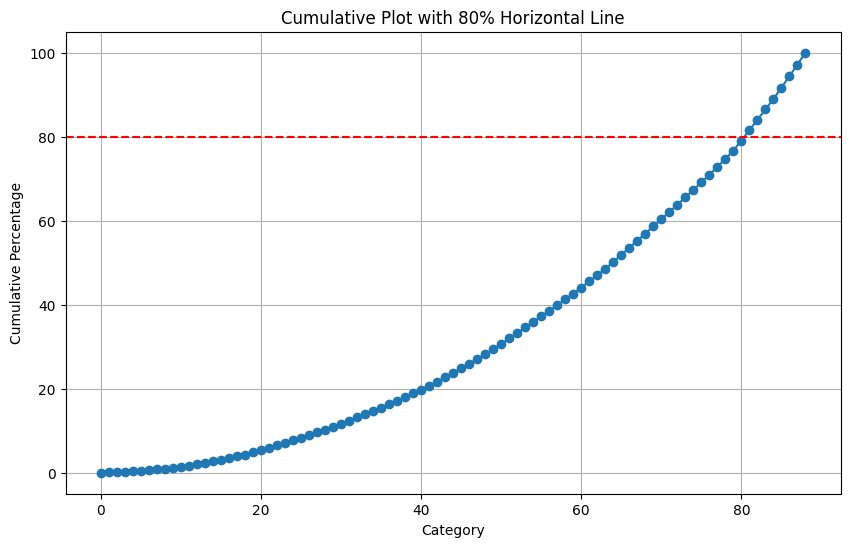

In [44]:




# Sort the DataFrame by the count column
neg_samples = neg_samples.sort_values(by='count', ascending=True)
neg_samples['serial_number'] = [i for i in range(len(neg_samples))]
# Calculate cumulative counts
neg_samples['cumulative_count'] = neg_samples['count'].cumsum()

# Normalize cumulative counts to get percentages
neg_samples['cumulative_percent'] = neg_samples['cumulative_count'] / neg_samples['count'].sum() * 100

# Plot cumulative counts
plt.figure(figsize=(10, 6))
plt.plot(neg_samples['serial_number'], neg_samples['cumulative_percent'], marker='o', linestyle='-')

# Add 80 percent horizontal line
plt.axhline(y=80, color='r', linestyle='--')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Cumulative Percentage')
plt.title('Cumulative Plot with 80% Horizontal Line')
plt.grid(True)
plt.show()

In [45]:
neg_samples.tail(20)

,subject,count,clinical_pathological_AD,serial_number,cumulative_count,cumulative_percent
54,ROSMAP-66658,1712,NCI_with_No_Plaques,69,59165,58.677391
51,ROSMAP-77461,1719,NCI_with_No_Plaques,70,60884,60.382224
50,ROSMAP-77461,1719,NCI_with_No_Plaques,71,62603,62.087057
49,ROSMAP-28539,1764,NCI_with_No_Plaques,72,64367,63.836519
48,ROSMAP-28539,1764,NCI_with_No_Plaques,73,66131,65.585981
43,ROSMAP-27818,1801,NCI_with_No_Plaques,74,67932,67.372138
42,ROSMAP-27818,1801,NCI_with_No_Plaques,75,69733,69.158295
37,ROSMAP-78527,1839,NCI_with_No_Plaques,76,71572,70.982138
32,ROSMAP-96129,1915,NCI_with_No_Plaques,77,73487,72.881356
31,ROSMAP-96129,1915,NCI_with_No_Plaques,78,75402,74.780573


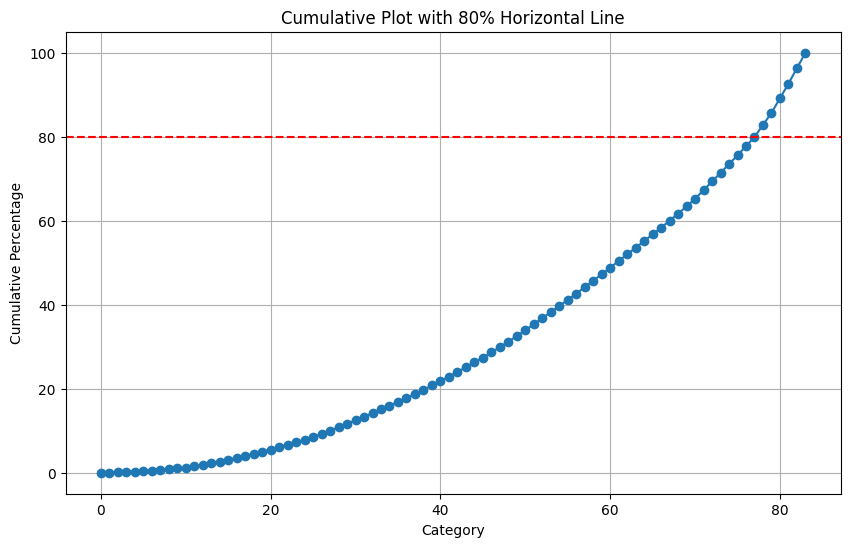

In [46]:
import pandas as pd
import matplotlib.pyplot as plt



# Sort the DataFrame by the count column
pos_samples = pos_samples.sort_values(by='count', ascending=True)
pos_samples['serial_number'] = [i for i in range(len(pos_samples))]
# Calculate cumulative counts
pos_samples['cumulative_count'] = pos_samples['count'].cumsum()

# Normalize cumulative counts to get percentages
pos_samples['cumulative_percent'] = pos_samples['cumulative_count'] / pos_samples['count'].sum() * 100

# Plot cumulative counts
plt.figure(figsize=(10, 6))
plt.plot(pos_samples['serial_number'], pos_samples['cumulative_percent'], marker='o', linestyle='-')

# Add 80 percent horizontal line
plt.axhline(y=80, color='r', linestyle='--')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Cumulative Percentage')
plt.title('Cumulative Plot with 80% Horizontal Line')
plt.grid(True)
plt.show()

In [47]:
pos_samples.tail(20)

,subject,count,clinical_pathological_AD,serial_number,cumulative_count,cumulative_percent
136,ROSMAP-37253,1099,AD_with_Plaques,64,38180,55.171816
132,ROSMAP-79151,1104,AD_with_Plaques,65,39284,56.767145
133,ROSMAP-79151,1104,AD_with_Plaques,66,40388,58.362475
125,ROSMAP-31874,1148,AD_with_Plaques,67,41536,60.021387
124,ROSMAP-10132,1149,AD_with_Plaques,68,42685,61.681743
110,ROSMAP-83961,1224,AD_with_Plaques,69,43909,63.450478
107,ROSMAP-25922,1244,AD_with_Plaques,70,45153,65.248114
86,ROSMAP-53808,1419,AD_with_Plaques,71,46572,67.298633
85,ROSMAP-53808,1419,AD_with_Plaques,72,47991,69.349152
83,ROSMAP-50941,1431,AD_with_Plaques,73,49422,71.417011


In [48]:
train_pos_samples = pos_samples[pos_samples.cumulative_percent<=80].subject
test_pos_samples = pos_samples[pos_samples.cumulative_percent>80].subject

In [49]:
test_pos_samples 

29    ROSMAP-87836
28    ROSMAP-87836
18    ROSMAP-40248
17    ROSMAP-40248
9     ROSMAP-83589
8     ROSMAP-83589
Name: subject, dtype: object

In [50]:
train_neg_samples = neg_samples[neg_samples.cumulative_percent<=80].subject
test_neg_samples = neg_samples[neg_samples.cumulative_percent>80].subject

In [51]:
train_neg_samples

467    ROSMAP-97816
466    ROSMAP-97816
462    ROSMAP-84621
460    ROSMAP-61943
448    ROSMAP-92734
           ...     
37     ROSMAP-78527
32     ROSMAP-96129
31     ROSMAP-96129
30     ROSMAP-82353
16     ROSMAP-25736
Name: subject, Length: 81, dtype: object

In [52]:
train_pos_samples

482    ROSMAP-72912
481    ROSMAP-78083
477    ROSMAP-80730
472    ROSMAP-18944
464    ROSMAP-25704
           ...     
83     ROSMAP-50941
82     ROSMAP-50941
79     ROSMAP-43882
73     ROSMAP-85806
74     ROSMAP-85806
Name: subject, Length: 78, dtype: object

In [53]:
train_samples = list(train_pos_samples) + (list(train_neg_samples))
test_samples = list(test_pos_samples) + (list(test_neg_samples))

In [54]:
len(train_samples)

159

In [55]:
len(test_samples)

14

In [56]:
def return_train_test(x):
    if x in train_samples:
        return 'train'
    elif x in test_samples:
        return 'test'
    else:
        return np.nan

In [57]:
single_cell_metadata['train_test_clinical_and_pathological'] = single_cell_metadata.subject.apply(return_train_test)

/tmp/ipykernel_570474/2784772941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_cell_metadata['train_test_clinical_and_pathological'] = single_cell_metadata.subject.apply(return_train_test)


In [58]:
single_cell_metadata.train_test_clinical_and_pathological.value_counts()

train_test_clinical_and_pathological
train    106821
test      17472
Name: count, dtype: int64

In [59]:
single_cell_metadata[single_cell_metadata.train_test_clinical_and_pathological=='train'].clinical_pathological_AD.value_counts()

AttributeError: 'DataFrame' object has no attribute 'clinical_pathological_AD'

In [55]:
single_cell_metadata[single_cell_metadata.train_test_clinical_and_pathological=='test'].clinical_pathological_AD.value_counts()

clinical_pathological_AD
NCI_with_No_Plaques    10531
AD_with_Plaques         6941
Name: count, dtype: int64

In [56]:
single_cell_metadata

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,log10GenesPerUMI,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,individualID,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD,train_test_clinical_and_pathological
0,AAACCCAAGAAATCCA.12.9,ROSMAP,13490,4276,0.237213,0.289103,0.879183,Inh L3-5 SST MAFB,ROSMAP-65967,yes,R3857147,AD,AD,AD_with_Plaques,train
1,AAACCCAAGAACGCGT.6.6,ROSMAP,2651,1533,8.185590,0.452659,0.930517,Inh L3-5 SST MAFB,ROSMAP-90639,yes,R7090624,NCI,AD,False,NaN
2,AAACCCAAGAACTGAT.10.12,ROSMAP,6550,2764,4.809160,0.274809,0.901814,Inh LAMP5 RELN,ROSMAP-57958,yes,R2347173,NCI,AD,False,NaN
3,AAACCCAAGAAGCGGG.31.8,ROSMAP,11658,4377,5.738549,0.394579,0.895381,Inh VIP CLSTN2,ROSMAP-40761,yes,R1287407,False,AD,False,NaN
4,AAACCCAAGAATCCCT.14.8,ROSMAP,15297,4688,0.921749,0.307250,0.877260,Inh VIP CLSTN2,ROSMAP-68841,yes,R3757880,NCI,AD,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424425,TTTGTTGTCTTAGCAG.7.9,ROSMAP,9309,3459,2.062520,0.225588,0.891670,Inh VIP TSHZ2,ROSMAP-77886,no,R2554598,NCI,False,False,NaN
424426,TTTGTTGTCTTCCCGA.28.6,ROSMAP,22844,5507,0.153213,0.358956,0.858250,Inh PVALB SULF1,ROSMAP-38931,no,R6292415,NCI,No AD,NCI_with_No_Plaques,train
424427,TTTGTTGTCTTCGACC.3.13,ROSMAP,16770,5431,2.098986,0.679785,0.884093,Inh CUX2 MSR1,ROSMAP-53472,yes,R3863249,False,False,False,NaN
424428,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,R5221394,NCI,No AD,NCI_with_No_Plaques,test


In [57]:
single_cell_metadata.to_csv('../../preprocessed_data/inhibitory_neuron/metadata_inhibitory_neurons.csv', index = False)

In [58]:
'LRIG2' in data.index.tolist()

True

In [59]:
from biomart import BiomartServer

# Connect to the Ensembl Biomart server
server = BiomartServer("http://www.ensembl.org/biomart")

# Access the Ensembl Genes dataset for Homo sapiens
dataset = server.datasets['hsapiens_gene_ensembl']

# Query the dataset for Ensembl IDs and gene names
response = dataset.search({
    'attributes': [
        'ensembl_gene_id', 
        'external_gene_name'
    ]
})

# Convert the response to a dataframe
import pandas as pd
from io import StringIO

data_ensemble_gene = StringIO(response.text)

df = pd.read_csv(data_ensemble_gene , sep="\t",header = None)

# Display the first few rows of the dataframe
print(df.head())
# Nice

                 0        1
0  ENSG00000210049    MT-TF
1  ENSG00000211459  MT-RNR1
2  ENSG00000210077    MT-TV
3  ENSG00000210082  MT-RNR2
4  ENSG00000209082   MT-TL1


In [60]:
df.tail(20)

,0,1
70591,ENSG00000198799,LRIG2
70592,ENSG00000237278,RLIMP2
70593,ENSG00000233839,NaN
70594,ENSG00000236887,NaN
70595,ENSG00000238765,RNA5SP57
70596,ENSG00000224335,NaN
70597,ENSG00000227700,NaN
70598,ENSG00000199879,RNVU1-22
70599,ENSG00000274020,LINC01138
70600,ENSG00000226716,NaN


In [61]:
data.reset_index()

,index,GCCGTGACACCGTGCA.11.9,ATGGGAGAGGCCCGTT.7.13,CACCGTTAGCTAGCCC.38.2,ACTTATCTCGAACGCC.8.10,ACTTCGCGTACTAACC.13.6,TGACAACAGGTACTCT.44.1,GGGACAATCTCTCCGA.21.11,TCGGGCAAGCGATGCA.20.2,ACTTCCGAGGTACATA.11.11,...,GCTACAAGTCAAGCCC.1.6,CCACTTGAGAGGTATT.24.8,ATTACCTAGAGCCGTA.7.13,TTTGGAGAGCATATGA.7.6,TTCTAACTCCGTAATG.22.9,TCCATCGCATCTGTTT.14.14,GTCAAGTAGTGGCCTC.21.2,CAGCCAGTCCGTAGGC.10.13,GGAAGTGGTATCCTCC.9.9,TTGCCTGGTGTATCCA.30.11
0,KRTCAP2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AL713999.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TRIM46,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,MUC1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AC234582.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,AC233755.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33534,AC233755.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33535,AC240274.1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
33536,AC213203.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
len(set(data.index.tolist()).intersection(set(df[1])))

22500

In [63]:
data

,GCCGTGACACCGTGCA.11.9,ATGGGAGAGGCCCGTT.7.13,CACCGTTAGCTAGCCC.38.2,ACTTATCTCGAACGCC.8.10,ACTTCGCGTACTAACC.13.6,TGACAACAGGTACTCT.44.1,GGGACAATCTCTCCGA.21.11,TCGGGCAAGCGATGCA.20.2,ACTTCCGAGGTACATA.11.11,TCAGTTTCATGGTACT.15.4,...,GCTACAAGTCAAGCCC.1.6,CCACTTGAGAGGTATT.24.8,ATTACCTAGAGCCGTA.7.13,TTTGGAGAGCATATGA.7.6,TTCTAACTCCGTAATG.22.9,TCCATCGCATCTGTTT.14.14,GTCAAGTAGTGGCCTC.21.2,CAGCCAGTCCGTAGGC.10.13,GGAAGTGGTATCCTCC.9.9,TTGCCTGGTGTATCCA.30.11
KRTCAP2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL713999.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRIM46,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
MUC1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC234582.1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC233755.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC240274.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
AC213203.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
import numpy as np
def return_ensemble_id(x):
    try:
        return df[df[1]==x][0].values[0]
    except: 
        return np.nan

In [65]:
x = data.reset_index()['index'].apply(return_ensemble_id)

In [66]:
x.value_counts()

index
ENSG00000274847    1
ENSG00000163463    1
ENSG00000163462    1
ENSG00000185499    1
ENSG00000275874    1
                  ..
ENSG00000263324    1
ENSG00000262785    1
ENSG00000160752    1
ENSG00000225855    1
ENSG00000160753    1
Name: count, Length: 22500, dtype: int64

In [67]:
x

0        ENSG00000163463
1                    NaN
2        ENSG00000163462
3        ENSG00000185499
4                    NaN
              ...       
33533                NaN
33534                NaN
33535                NaN
33536                NaN
33537                NaN
Name: index, Length: 33538, dtype: object

In [68]:
data['ensemble_gene_name'] = x.tolist()

In [69]:
data

,GCCGTGACACCGTGCA.11.9,ATGGGAGAGGCCCGTT.7.13,CACCGTTAGCTAGCCC.38.2,ACTTATCTCGAACGCC.8.10,ACTTCGCGTACTAACC.13.6,TGACAACAGGTACTCT.44.1,GGGACAATCTCTCCGA.21.11,TCGGGCAAGCGATGCA.20.2,ACTTCCGAGGTACATA.11.11,TCAGTTTCATGGTACT.15.4,...,CCACTTGAGAGGTATT.24.8,ATTACCTAGAGCCGTA.7.13,TTTGGAGAGCATATGA.7.6,TTCTAACTCCGTAATG.22.9,TCCATCGCATCTGTTT.14.14,GTCAAGTAGTGGCCTC.21.2,CAGCCAGTCCGTAGGC.10.13,GGAAGTGGTATCCTCC.9.9,TTGCCTGGTGTATCCA.30.11,ensemble_gene_name
KRTCAP2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000163463
AL713999.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
TRIM46,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,ENSG00000163462
MUC1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000185499
AC234582.1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
AC233755.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
AC240274.1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,NaN
AC213203.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [70]:
data = data.dropna()
data

,GCCGTGACACCGTGCA.11.9,ATGGGAGAGGCCCGTT.7.13,CACCGTTAGCTAGCCC.38.2,ACTTATCTCGAACGCC.8.10,ACTTCGCGTACTAACC.13.6,TGACAACAGGTACTCT.44.1,GGGACAATCTCTCCGA.21.11,TCGGGCAAGCGATGCA.20.2,ACTTCCGAGGTACATA.11.11,TCAGTTTCATGGTACT.15.4,...,CCACTTGAGAGGTATT.24.8,ATTACCTAGAGCCGTA.7.13,TTTGGAGAGCATATGA.7.6,TTCTAACTCCGTAATG.22.9,TCCATCGCATCTGTTT.14.14,GTCAAGTAGTGGCCTC.21.2,CAGCCAGTCCGTAGGC.10.13,GGAAGTGGTATCCTCC.9.9,TTGCCTGGTGTATCCA.30.11,ensemble_gene_name
KRTCAP2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000163463
TRIM46,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,ENSG00000163462
MUC1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000185499
THBS3,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000169231
MTX1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,ENSG00000261905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND4,6,5,11,86,43,23,9,7,24,12,...,60,20,40,16,24,5,25,0,7,ENSG00000198886
MT-ND5,2,2,0,26,1,4,1,0,5,6,...,11,3,3,3,5,1,9,2,2,ENSG00000198786
MT-ND6,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,ENSG00000198695
MT-CYB,8,6,25,78,15,25,10,3,19,37,...,57,14,20,23,18,6,27,2,5,ENSG00000198727


In [71]:
data.set_index('ensemble_gene_name', inplace = True)

In [72]:
data

,GCCGTGACACCGTGCA.11.9,ATGGGAGAGGCCCGTT.7.13,CACCGTTAGCTAGCCC.38.2,ACTTATCTCGAACGCC.8.10,ACTTCGCGTACTAACC.13.6,TGACAACAGGTACTCT.44.1,GGGACAATCTCTCCGA.21.11,TCGGGCAAGCGATGCA.20.2,ACTTCCGAGGTACATA.11.11,TCAGTTTCATGGTACT.15.4,...,GCTACAAGTCAAGCCC.1.6,CCACTTGAGAGGTATT.24.8,ATTACCTAGAGCCGTA.7.13,TTTGGAGAGCATATGA.7.6,TTCTAACTCCGTAATG.22.9,TCCATCGCATCTGTTT.14.14,GTCAAGTAGTGGCCTC.21.2,CAGCCAGTCCGTAGGC.10.13,GGAAGTGGTATCCTCC.9.9,TTGCCTGGTGTATCCA.30.11
ensemble_gene_name,,,,,,,,,,,,,,,,,,,,,
ENSG00000163463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000163462,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
ENSG00000185499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000169231,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000261905,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198886,6,5,11,86,43,23,9,7,24,12,...,26,60,20,40,16,24,5,25,0,7
ENSG00000198786,2,2,0,26,1,4,1,0,5,6,...,7,11,3,3,3,5,1,9,2,2
ENSG00000198695,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [107]:
df[df[1]=='MT-ND5'][0].values[0]

'ENSG00000198786'

In [108]:
pickle_file_path = '../../preprocessed_data/inhibitory_neuron/count_matrix_ensemble_id_inhibitory.pkl'
data.to_pickle(pickle_file_path)

In [73]:
df_loaded = data

In [83]:
single_cell_metadata = single_cell_metadata[single_cell_metadata.cell_id.isin(data.columns.tolist())]

In [92]:
single_cell_metadata

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,log10GenesPerUMI,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,individualID,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD,train_test_clinical_and_pathological
0,AAACCCAAGAAATCCA.12.9,ROSMAP,13490,4276,0.237213,0.289103,0.879183,Inh L3-5 SST MAFB,ROSMAP-65967,yes,R3857147,AD,AD,AD_with_Plaques,train
2,AAACCCAAGAACTGAT.10.12,ROSMAP,6550,2764,4.809160,0.274809,0.901814,Inh LAMP5 RELN,ROSMAP-57958,yes,R2347173,NCI,AD,False,NaN
3,AAACCCAAGAAGCGGG.31.8,ROSMAP,11658,4377,5.738549,0.394579,0.895381,Inh VIP CLSTN2,ROSMAP-40761,yes,R1287407,False,AD,False,NaN
13,AAACCCAAGACTCTTG.2.4,ROSMAP,19464,5267,0.709001,0.303124,0.867653,Inh PVALB HTR4,ROSMAP-30479,yes,R2398487,AD,False,False,NaN
14,AAACCCAAGAGGCGTT.1.11,ROSMAP,5782,2943,0.830163,0.397786,0.922041,Inh VIP CLSTN2,ROSMAP-59604,no,R8799615,False,No AD,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424419,TTTGTTGTCTGGAAGG.44.2,ROSMAP,8260,3331,8.789346,0.181598,0.899309,Inh L1 PAX6 CA4,ROSMAP-17199,yes,R1617674,AD,False,False,NaN
424422,TTTGTTGTCTTACACT.27.3,ROSMAP,40445,7315,0.487081,0.279392,0.838795,Inh PVALB HTR4,ROSMAP-18464,yes,R5405023,AD,AD,AD_with_Plaques,train
424426,TTTGTTGTCTTCCCGA.28.6,ROSMAP,22844,5507,0.153213,0.358956,0.858250,Inh PVALB SULF1,ROSMAP-38931,no,R6292415,NCI,No AD,NCI_with_No_Plaques,train
424427,TTTGTTGTCTTCGACC.3.13,ROSMAP,16770,5431,2.098986,0.679785,0.884093,Inh CUX2 MSR1,ROSMAP-53472,yes,R3863249,False,False,False,NaN


In [84]:
m = list(single_cell_metadata[single_cell_metadata.train_test_clinical_and_pathological == 'train'].cell_id)
label_train = list(single_cell_metadata[single_cell_metadata.train_test_clinical_and_pathological == 'train'].clinical_pathological_AD)
m[0:10]

['AAACCCAAGAAATCCA.12.9',
 'AAACCCAAGATTCGCT.20.4',
 'AAACCCAAGCCATCCG.21.6',
 'AAACCCAAGCCTATTG.18.6',
 'AAACCCAAGCTAGATA.25.10',
 'AAACCCAAGCTAGTTC.31.9',
 'AAACCCAAGGCTATCT.18.7',
 'AAACCCAAGGTGCTAG.19.10',
 'AAACCCAAGGTTATAG.23.10',
 'AAACCCAAGTCGCCCA.18.6']

In [85]:
label_train[0:10]

['AD_with_Plaques',
 'NCI_with_No_Plaques',
 'AD_with_Plaques',
 'AD_with_Plaques',
 'AD_with_Plaques',
 'NCI_with_No_Plaques',
 'AD_with_Plaques',
 'NCI_with_No_Plaques',
 'AD_with_Plaques',
 'AD_with_Plaques']

In [87]:
single_cell_metadata[single_cell_metadata.cell_id == 'AAACCCAAGAAATCCA.12.9'].clinical_pathological_AD

0    AD_with_Plaques
Name: clinical_pathological_AD, dtype: object

In [88]:

train_count_matrix = df_loaded[m]
train_count_matrix

,AAACCCAAGAAATCCA.12.9,AAACCCAAGATTCGCT.20.4,AAACCCAAGCCATCCG.21.6,AAACCCAAGCCTATTG.18.6,AAACCCAAGCTAGATA.25.10,AAACCCAAGCTAGTTC.31.9,AAACCCAAGGCTATCT.18.7,AAACCCAAGGTGCTAG.19.10,AAACCCAAGGTTATAG.23.10,AAACCCAAGTCGCCCA.18.6,...,TTTGTTGGTGGATCGA.32.3,TTTGTTGGTGTACATC.20.4,TTTGTTGGTTACGCCG.1.5,TTTGTTGTCAAATGAG.20.11,TTTGTTGTCAAATGCC.9.14,TTTGTTGTCACACCGG.11.9,TTTGTTGTCCGAAATC.9.14,TTTGTTGTCGAACCTA.5.2,TTTGTTGTCTTACACT.27.3,TTTGTTGTCTTCCCGA.28.6
ensemble_gene_name,,,,,,,,,,,,,,,,,,,,,
ENSG00000163463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000163462,0,0,0,0,1,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
ENSG00000185499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000169231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000261905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198886,0,12,3,21,32,35,10,1,9,6,...,3,26,44,19,0,8,4,6,7,1
ENSG00000198786,3,4,0,2,10,2,4,0,1,2,...,2,6,7,1,0,6,0,2,4,2
ENSG00000198695,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
n = list(single_cell_metadata[single_cell_metadata.train_test_clinical_and_pathological == 'test'].cell_id)
label_test = list(single_cell_metadata[single_cell_metadata.train_test_clinical_and_pathological == 'test'].clinical_pathological_AD)
n[0:10]

['AAACCCAAGGGCCCTT.21.11',
 'AAACCCACAACGGCCT.32.11',
 'AAACCCACACAAGCAG.42.2',
 'AAACCCACAGTCACGC.40.2',
 'AAACCCAGTGTACGCC.21.11',
 'AAACCCATCAGACCCG.6.2',
 'AAACCCATCGGTCATA.13.11',
 'AAACCCATCTACTATC.32.11',
 'AAACCTGAGTACGTAA.38.1',
 'AAACCTGCACATCCAA.38.1']

In [90]:
test_count_matrix = df_loaded[n]
test_count_matrix

,AAACCCAAGGGCCCTT.21.11,AAACCCACAACGGCCT.32.11,AAACCCACACAAGCAG.42.2,AAACCCACAGTCACGC.40.2,AAACCCAGTGTACGCC.21.11,AAACCCATCAGACCCG.6.2,AAACCCATCGGTCATA.13.11,AAACCCATCTACTATC.32.11,AAACCTGAGTACGTAA.38.1,AAACCTGCACATCCAA.38.1,...,TTTGGTTTCTGCAGCG.34.2,TTTGTCAGTCAGGACA.38.1,TTTGTTGCACAAGGTG.40.2,TTTGTTGCACTACCGG.8.11,TTTGTTGCAGGTCAAG.13.2,TTTGTTGCAGGTTTAC.13.2,TTTGTTGTCAAACTGC.8.11,TTTGTTGTCCTCCACA.13.2,TTTGTTGTCCTGTAAG.32.11,TTTGTTGTCTTGGTGA.8.11
ensemble_gene_name,,,,,,,,,,,,,,,,,,,,,
ENSG00000163463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000163462,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
ENSG00000185499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000169231,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000261905,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198886,2,0,32,0,11,17,8,2,5,83,...,2,9,19,0,24,25,24,19,4,3
ENSG00000198786,4,0,6,0,1,5,1,1,1,7,...,1,1,1,0,6,5,5,6,0,0
ENSG00000198695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
single_cell_metadata[single_cell_metadata.cell_id =='AAACCCACAGCACAGA.23.6']

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,log10GenesPerUMI,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,individualID,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD,train_test_clinical_and_pathological


In [93]:
test_label = pd.DataFrame(label_test,columns=['diagnosis'])
train_label = pd.DataFrame(label_train,columns=['diagnosis'])

In [94]:
test_label.diagnosis.value_counts()

diagnosis
NCI_with_No_Plaques    5241
AD_with_Plaques        3442
Name: count, dtype: int64

In [95]:
train_label.diagnosis.value_counts()

diagnosis
NCI_with_No_Plaques    29147
AD_with_Plaques        24372
Name: count, dtype: int64

In [96]:
#/12tb_dsk1/usman/Single_Cell_Microglia_Project/preprocessed_data/train_test_set

test_count_matrix.to_csv('../../preprocessed_data/inhibitory_neuron/train_test_set/test_count_matrix.csv')
train_count_matrix.to_csv('../../preprocessed_data/inhibitory_neuron/train_test_set/train_count_matrix.csv')

test_label.to_csv('../../preprocessed_data/inhibitory_neuron/train_test_set/test_label.csv', index = False)
train_label.to_csv('../../preprocessed_data/inhibitory_neuron/train_test_set/train_label.csv', index = False)

In [ ]:
#We have the train test sets here

In [2]:
rdata = pd.read_csv('../../preprocessed_data/inhibitory_neuron/train_test_set/train_count_matrix.csv')
qdata = pd.read_csv('../../preprocessed_data/inhibitory_neuron/train_test_set/test_count_matrix.csv')


In [3]:
rlabel = pd.read_csv('../../preprocessed_data/inhibitory_neuron/train_test_set/train_label.csv')
qlabel = pd.read_csv('../../preprocessed_data/inhibitory_neuron/train_test_set/test_label.csv')

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from skorch import NeuralNetClassifier
from skorch.helper import SliceDict
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [17]:

from torch.utils.data import DataLoader, TensorDataset


train_labels = pd.Series(rlabel['diagnosis'].values, index=rdata.columns[1:])
test_labels = pd.Series(qlabel['diagnosis'].values, index=qdata.columns[1:]) 


label_mapping = {'AD_with_Plaques': 1, 'NCI_with_No_Plaques': 0}
train_labels = train_labels.map(label_mapping)
test_labels = test_labels.map(label_mapping)



X_train = rdata.set_index('ensemble_gene_name').T
X_test = qdata.set_index('ensemble_gene_name').T


train_labels = train_labels.loc[X_train.index]
test_labels = test_labels.loc[X_test.index]


X_train = X_train.values
y_train = train_labels.values
X_test = X_test.values
y_test = test_labels.values

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


print("Training set:", X_train_tensor.shape, y_train_tensor.shape)
print("Test set:", X_test_tensor.shape, y_test_tensor.shape)


Training set: torch.Size([53519, 22500]) torch.Size([53519, 1])
Test set: torch.Size([8683, 22500]) torch.Size([8683, 1])


In [18]:
# Check the distribution of classes in the training set
train_label_counts = pd.Series(y_train).value_counts()
print("Training set class distribution:")
print(train_label_counts)

# Check the distribution of classes in the test set
test_label_counts = pd.Series(y_test).value_counts()
print("Test set class distribution:")
print(test_label_counts)


Training set class distribution:
0    29147
1    24372
Name: count, dtype: int64
Test set class distribution:
0    5241
1    3442
Name: count, dtype: int64


In [15]:
pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
#hidden_dim = 128
#learning_rate = 0.001
#num_epochs = 50
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
from imblearn.over_sampling import SMOTE

In [13]:
import torch.nn as nn
import torch
import torch.optim as optim
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_layers, output_dim, activation_func):
        super(SimpleNN, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input_dim, hidden_dim))
        
        for _ in range(n_layers - 1):
            self.hidden_layers.append(nn.Linear(hidden_dim, hidden_dim))
        
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.activation_func = activation_func
    
    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.activation_func(layer(x))
        x = self.output_layer(x)
        return x

hidden_dim = 512
learning_rate = 0.001
num_epochs = 50
n_layers = 5
activation_func = F.relu

input_dim = X_train_tensor.shape[1]
output_dim = 1

model = SimpleNN(input_dim, hidden_dim, n_layers, output_dim, activation_func)

criterion = nn.BCEWithLogitsLoss()

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_train)
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# Modify the optimizer to use the class weights
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        labels = labels.view(-1, 1)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

print('Finished Training')

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()
    test_predictions = torch.round(torch.sigmoid(test_outputs))
    
    accuracy = accuracy_score(y_test_tensor, test_predictions)
    auc = roc_auc_score(y_test_tensor, test_outputs)
    f1 = f1_score(y_test_tensor, test_predictions)
    recall = recall_score(y_test_tensor, test_predictions)
    
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Test AUC: {auc:.4f}')
    print(f'Test F1 Score: {f1:.4f}')
    print(f'Test Recall: {recall:.4f}')

Epoch [1/50], Loss: 0.6201
Epoch [2/50], Loss: 0.5109
Epoch [3/50], Loss: 0.4588
Epoch [4/50], Loss: 0.4092
Epoch [5/50], Loss: 0.3717
Epoch [6/50], Loss: 0.3510
Epoch [7/50], Loss: 0.3278
Epoch [8/50], Loss: 0.3080
Epoch [9/50], Loss: 0.2913
Epoch [10/50], Loss: 0.2799
Epoch [11/50], Loss: 0.2686
Epoch [12/50], Loss: 0.2537
Epoch [13/50], Loss: 0.2508
Epoch [14/50], Loss: 0.2466
Epoch [15/50], Loss: 0.2428
Epoch [16/50], Loss: 0.2279
Epoch [17/50], Loss: 0.2284
Epoch [18/50], Loss: 0.2203
Epoch [19/50], Loss: 0.2082
Epoch [20/50], Loss: 0.2296
Epoch [21/50], Loss: 0.2060
Epoch [22/50], Loss: 0.2540
Epoch [23/50], Loss: 0.2100
Epoch [24/50], Loss: 0.2140
Epoch [25/50], Loss: 0.1911
Epoch [26/50], Loss: 0.2808
Epoch [27/50], Loss: 0.5004
Epoch [28/50], Loss: 0.4774
Epoch [29/50], Loss: 0.4587
Epoch [30/50], Loss: 0.4795
Epoch [31/50], Loss: 0.4559
Epoch [32/50], Loss: 0.4116
Epoch [33/50], Loss: 0.4002
Epoch [34/50], Loss: 0.3999
Epoch [35/50], Loss: 0.4030
Epoch [36/50], Loss: 0.3714
E

In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()
    test_predictions = torch.round(torch.sigmoid(test_outputs))
    
    accuracy = accuracy_score(y_test_tensor, test_predictions)
    auc = roc_auc_score(y_test_tensor, test_outputs)
    f1 = f1_score(y_test_tensor, test_predictions)
    recall = recall_score(y_test_tensor, test_predictions)
    
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Test AUC: {auc:.4f}')
    print(f'Test F1 Score: {f1:.4f}')
    print(f'Test Recall: {recall:.4f}')


Test Accuracy: 0.6509
Test AUC: 0.6577
Test F1 Score: 0.4646
Test Recall: 0.3820


In [20]:
train_labels = pd.Series(rlabel['diagnosis'].values, index=rdata.columns[1:])
test_labels = pd.Series(qlabel['diagnosis'].values, index=qdata.columns[1:]) 

label_mapping = {'AD_with_Plaques': 1, 'NCI_with_No_Plaques': 0}
train_labels = train_labels.map(label_mapping)
test_labels = test_labels.map(label_mapping)

X_train = rdata.set_index('ensemble_gene_name').T
X_test = qdata.set_index('ensemble_gene_name').T

train_labels = train_labels.loc[X_train.index]
test_labels = test_labels.loc[X_test.index]

X_train = X_train.values
y_train = train_labels.values
X_test = X_test.values
y_test = test_labels.values

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the distribution after SMOTE
print("Training set class distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())

# Convert to tensors
X_train_tensor = torch.tensor(X_train_res, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_res, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# DataLoader for balanced dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_layers, output_dim, activation_func, dropout_rate=0.5):
        super(SimpleNN, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.batch_norm_layers = nn.ModuleList()
        self.dropout = nn.Dropout(dropout_rate)
        
        self.hidden_layers.append(nn.Linear(input_dim, hidden_dim))
        self.batch_norm_layers.append(nn.BatchNorm1d(hidden_dim))
        
        for _ in range(n_layers - 1):
            self.hidden_layers.append(nn.Linear(hidden_dim, hidden_dim))
            self.batch_norm_layers.append(nn.BatchNorm1d(hidden_dim))
        
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.activation_func = activation_func
    
    def forward(self, x):
        for layer, bn_layer in zip(self.hidden_layers, self.batch_norm_layers):
            x = self.activation_func(layer(x))
            x = bn_layer(x)
            x = self.dropout(x)
        x = self.output_layer(x)
        return x

# Update hyperparameters
hidden_dim = 256
learning_rate = 0.001
num_epochs = 50
n_layers = 3
activation_func = F.relu
dropout_rate = 0.5

input_dim = X_train_tensor.shape[1]
output_dim = 1

model = SimpleNN(input_dim, hidden_dim, n_layers, output_dim, activation_func, dropout_rate)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        labels = labels.view(-1, 1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

print('Finished Training')

# Evaluation
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()
    test_predictions = torch.round(torch.sigmoid(test_outputs))
    
    accuracy = accuracy_score(y_test_tensor, test_predictions)
    auc = roc_auc_score(y_test_tensor, test_outputs)
    f1 = f1_score(y_test_tensor, test_predictions)
    recall = recall_score(y_test_tensor, test_predictions)
    
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Test AUC: {auc:.4f}')
    print(f'Test F1 Score: {f1:.4f}')
    print(f'Test Recall: {recall:.4f}')

Training set class distribution after SMOTE:
1    29147
0    29147
Name: count, dtype: int64
Epoch [1/50], Loss: 0.6165
Epoch [2/50], Loss: 0.5605
Epoch [3/50], Loss: 0.5147
Epoch [4/50], Loss: 0.5011
Epoch [5/50], Loss: 0.4839
Epoch [6/50], Loss: 0.4714
Epoch [7/50], Loss: 0.4527
Epoch [8/50], Loss: 0.4340
Epoch [9/50], Loss: 0.4213
Epoch [10/50], Loss: 0.4106
Epoch [11/50], Loss: 0.4075
Epoch [12/50], Loss: 0.4089
Epoch [13/50], Loss: 0.3992
Epoch [14/50], Loss: 0.3826
Epoch [15/50], Loss: 0.3685
Epoch [16/50], Loss: 0.3667
Epoch [17/50], Loss: 0.3529
Epoch [18/50], Loss: 0.3487
Epoch [19/50], Loss: 0.3516
Epoch [20/50], Loss: 0.3409
Epoch [21/50], Loss: 0.3317
Epoch [22/50], Loss: 0.3253
Epoch [23/50], Loss: 0.3200
Epoch [24/50], Loss: 0.3132
Epoch [25/50], Loss: 0.3105
Epoch [26/50], Loss: 0.3008
Epoch [27/50], Loss: 0.3134
Epoch [28/50], Loss: 0.3030
Epoch [29/50], Loss: 0.2892
Epoch [30/50], Loss: 0.2893
Epoch [31/50], Loss: 0.2776
Epoch [32/50], Loss: 0.2761
Epoch [33/50], Loss:

In [21]:
train_labels = pd.Series(rlabel['diagnosis'].values, index=rdata.columns[1:])
test_labels = pd.Series(qlabel['diagnosis'].values, index=qdata.columns[1:]) 

label_mapping = {'AD_with_Plaques': 1, 'NCI_with_No_Plaques': 0}
train_labels = train_labels.map(label_mapping)
test_labels = test_labels.map(label_mapping)

X_train = rdata.set_index('ensemble_gene_name').T
X_test = qdata.set_index('ensemble_gene_name').T

train_labels = train_labels.loc[X_train.index]
test_labels = test_labels.loc[X_test.index]

X_train = X_train.values
y_train = train_labels.values
X_test = X_test.values
y_test = test_labels.values

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the distribution after SMOTE
print("Training set class distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())

# Convert to tensors
X_train_tensor = torch.tensor(X_train_res, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_res, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# DataLoader for balanced dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network with dropout and batch normalization
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_layers, output_dim, activation_func, dropout_rate=0.5):
        super(SimpleNN, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.batch_norm_layers = nn.ModuleList()
        self.dropout = nn.Dropout(dropout_rate)
        
        self.hidden_layers.append(nn.Linear(input_dim, hidden_dim))
        self.batch_norm_layers.append(nn.BatchNorm1d(hidden_dim))
        
        for _ in range(n_layers - 1):
            self.hidden_layers.append(nn.Linear(hidden_dim, hidden_dim))
            self.batch_norm_layers.append(nn.BatchNorm1d(hidden_dim))
        
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.activation_func = activation_func
    
    def forward(self, x):
        for layer, bn_layer in zip(self.hidden_layers, self.batch_norm_layers):
            x = self.activation_func(layer(x))
            x = bn_layer(x)
            x = self.dropout(x)
        x = self.output_layer(x)
        return x

# Update hyperparameters
hidden_dim = 256
learning_rate = 0.001
num_epochs = 100
n_layers = 3
activation_func = nn.ReLU()
dropout_rate = 0.5

input_dim = X_train_tensor.shape[1]
output_dim = 1

model = SimpleNN(input_dim, hidden_dim, n_layers, output_dim, activation_func, dropout_rate)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        labels = labels.view(-1, 1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    scheduler.step()
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

print('Finished Training')

# Evaluation
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()
    test_predictions = torch.round(torch.sigmoid(test_outputs))
    
    accuracy = accuracy_score(y_test_tensor, test_predictions)
    auc = roc_auc_score(y_test_tensor, test_outputs)
    f1 = f1_score(y_test_tensor, test_predictions)
    recall = recall_score(y_test_tensor, test_predictions)
    
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Test AUC: {auc:.4f}')
    print(f'Test F1 Score: {f1:.4f}')
    print(f'Test Recall: {recall:.4f}')

Training set class distribution after SMOTE:
1    29147
0    29147
Name: count, dtype: int64
Epoch [1/100], Loss: 0.6217
Epoch [2/100], Loss: 0.5637
Epoch [3/100], Loss: 0.5155
Epoch [4/100], Loss: 0.5212
Epoch [5/100], Loss: 0.4882
Epoch [6/100], Loss: 0.4664
Epoch [7/100], Loss: 0.4541
Epoch [8/100], Loss: 0.4393
Epoch [9/100], Loss: 0.4301
Epoch [10/100], Loss: 0.4201
Epoch [11/100], Loss: 0.3777
Epoch [12/100], Loss: 0.3697
Epoch [13/100], Loss: 0.3665
Epoch [14/100], Loss: 0.3579
Epoch [15/100], Loss: 0.3579
Epoch [16/100], Loss: 0.3519
Epoch [17/100], Loss: 0.3506
Epoch [18/100], Loss: 0.3468
Epoch [19/100], Loss: 0.3402
Epoch [20/100], Loss: 0.3411
Epoch [21/100], Loss: 0.3316
Epoch [22/100], Loss: 0.3317
Epoch [23/100], Loss: 0.3317
Epoch [24/100], Loss: 0.3320
Epoch [25/100], Loss: 0.3318
Epoch [26/100], Loss: 0.3302
Epoch [27/100], Loss: 0.3291
Epoch [28/100], Loss: 0.3309
Epoch [29/100], Loss: 0.3278
Epoch [30/100], Loss: 0.3272
Epoch [31/100], Loss: 0.3257
Epoch [32/100], L

In [17]:
####
#####
#####
#####
#####
#####
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Load your data
#rdata = pd.read_csv('../../preprocessed_data/inhibitory_neuron/train_test_set/train_count_matrix.csv')
#qdata = pd.read_csv('../../preprocessed_data/inhibitory_neuron/train_test_set/test_count_matrix.csv')
#rlabel = pd.read_csv('../../preprocessed_data/inhibitory_neuron/train_test_set/train_label.csv')
#qlabel = pd.read_csv('../../preprocessed_data/inhibitory_neuron/train_test_set/test_label.csv')

train_labels = pd.Series(rlabel['diagnosis'].values, index=rdata.columns[1:])
test_labels = pd.Series(qlabel['diagnosis'].values, index=qdata.columns[1:]) 

label_mapping = {'AD_with_Plaques': 1, 'NCI_with_No_Plaques': 0}
train_labels = train_labels.map(label_mapping)
test_labels = test_labels.map(label_mapping)

# Prepare data
X_train = rdata.set_index('ensemble_gene_name').T
X_test = qdata.set_index('ensemble_gene_name').T
train_labels = train_labels.loc[X_train.index]
test_labels = test_labels.loc[X_test.index]

X_train = X_train.values
y_train = train_labels.values
X_test = X_test.values
y_test = test_labels.values

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Select 10% of the data
X_train_small, _, y_train_small, _ = train_test_split(X_train_tensor, y_train_tensor, test_size=0.9, stratify=y_train_tensor, random_state=42)
# Model definition
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers=1, activation_func=F.relu):
        super(SimpleNN, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input_dim, hidden_dim))
        for _ in range(n_layers - 1):
            self.hidden_layers.append(nn.Linear(hidden_dim, hidden_dim))
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.activation_func = activation_func
    
    def forward(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
            x = self.activation_func(x)
        x = self.output_layer(x)
        return x

# Grid search setup
net = NeuralNetClassifier(
    SimpleNN,
    module__input_dim=X_train_small.shape[1],
    module__output_dim=1,
    max_epochs=20,
    lr=0.01,
    criterion=nn.BCEWithLogitsLoss,
    optimizer=optim.Adam,
    batch_size=32,
    iterator_train__shuffle=True,
    train_split=None,
    verbose=1
)

param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'module__hidden_dim': [64, 128, 256],
    'module__n_layers': [1, 2, 3],
    'module__activation_func': [F.relu, F.sigmoid, F.tanh]
}

gs = GridSearchCV(net, param_grid, refit=True, cv=3, scoring='accuracy', verbose=2)

# Fit the grid search on the small dataset
gs.fit(X_train_small, y_train_small)

print("Best parameters found: ", gs.best_params_)
print("Best accuracy: ", gs.best_score_)


####
#####
#####
#####
#####
#####

Fitting 3 folds for each of 81 candidates, totalling 243 fits
  epoch    train_loss     dur
-------  ------------  ------
      1        0.7748  0.4128
      2        0.5977  0.4123
      3        0.4798  0.4121
      4        0.3810  0.4127
      5        0.2968  0.4126
      6        0.2178  0.4109
      7        0.1832  0.4097
      8        0.1819  0.4112
      9        0.0956  0.4103
     10        0.0672  0.4113
     11        0.0520  0.4107
     12        0.0344  0.4099
     13        0.0244  0.4100
     14        0.0178  0.4107
     15        0.0134  0.4111
     16        0.0104  0.4100
     17        0.0092  0.4118
     18        0.0065  0.4106
     19        0.0053  0.4114
     20        0.0044  0.4117
[CV] END lr=0.001, module__activation_func=<function relu at 0x7cad8477f1f0>, module__hidden_dim=64, module__n_layers=1; total time=   8.4s
  epoch    train_loss     dur
-------  ------------  ------
      1        1.0239  0.4158
      2        0.5898  0.4128
      3        0.4

In [22]:
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
input_dim = X_train_tensor.shape[1]  # Number of genes
hidden_dim = 128  # Example hidden layer size
output_dim = 1  # Binary classification: Alzheimer's vs. Control
model = SimpleNN(input_dim, hidden_dim, output_dim)


In [23]:
import torch.optim as optim

# Hyperparameters
learning_rate = 0.001
num_epochs = 60

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


ValueError: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))

In [22]:
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
input_dim = X_train_tensor.shape[1]  # Number of genes
hidden_dim = 128  # Example hidden layer size
output_dim = 1  # Binary classification: Alzheimer's vs. Control
model = SimpleNN(input_dim, hidden_dim, output_dim)


In [20]:
pip install skorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
import torch
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Initialize the model
input_dim = X_train_tensor.shape[1]  # Number of genes (features)
hidden_dim = 128  # Example hidden layer size
output_dim = 1  # Binary classification: Alzheimer's vs. Control
model = SimpleNN(input_dim, hidden_dim, output_dim)


In [27]:
X_train = X_train_tensor.numpy()
y_train = y_train_tensor.numpy()

# Reshape y_train to be a 2D array
y_train = y_train.reshape(-1, 1)


In [29]:
net = NeuralNetClassifier(
    SimpleNN,
    module__input_dim=X_train.shape[1],
    module__hidden_dim=128,  # Example hidden layer size, this can be tuned
    module__output_dim=1,
    max_epochs=20,
    lr=0.01,
    iterator_train__shuffle=True,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    criterion=nn.BCEWithLogitsLoss
)

In [18]:
params = {
    'lr': [0.001, 0.01, 0.1],
    'max_epochs': [20, 50, 70],
    'module__hidden_dim': [64, 128, 256],
}

# Initialize GridSearchCV with the skorch classifier and parameter grid
gs = GridSearchCV(net, params, refit=True, cv=3, scoring='roc_auc')

# Fit GridSearchCV
gs.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", gs.best_params_)

NameError: name 'GridSearchCV' is not defined

In [17]:
import torch
import torch.nn as nn
from skorch import NeuralNetClassifier

# Define the neural network class (SimpleNN)
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Best parameters from GridSearchCV
best_params = gs.best_params_

# Initialize the final model with the best parameters
final_model = NeuralNetClassifier(
    SimpleNN,
    module__input_dim=X_train.shape[1],
    module__hidden_dim=best_params['module__hidden_dim'],
    module__output_dim=1,
    max_epochs=best_params['max_epochs'],
    lr=best_params['lr'],
    iterator_train__shuffle=True,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    criterion=nn.BCEWithLogitsLoss
)

# Train the final model
final_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_proba = final_model.predict_proba(X_test)[:, 1]
y_pred = final_model.predict(X_test)

# Calculate accuracy
accuracy = (y_pred == y_test).mean()
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate ROC AUC score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test AUC: {auc:.4f}")

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")


NameError: name 'gs' is not defined

In [87]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming you have defined your model, criterion, optimizer, and data loaders

# Example training loop
for inputs, labels in train_loader:
    # Ensure labels are reshaped to match the output shape of your model
    labels = labels.view(-1, 1)  # Reshape labels to (batch_size, 1)
    
    # Forward pass
    outputs = model(inputs)
    
    # Compute loss
    loss = criterion(outputs, labels)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


In [89]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming you have defined your model, criterion, optimizer, and data loaders

# Example training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Ensure labels are reshaped to match the output shape of your model
        labels = labels.view(-1, 1)  # Reshape labels to (batch_size, 1)

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)  # Accumulate the loss

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

print('Finished Training')



Epoch [1/50], Loss: 0.4880
Epoch [2/50], Loss: 0.4303
Epoch [3/50], Loss: 0.3954
Epoch [4/50], Loss: 0.3486
Epoch [5/50], Loss: 0.3176
Epoch [6/50], Loss: 0.2904
Epoch [7/50], Loss: 0.2548
Epoch [8/50], Loss: 0.2137
Epoch [9/50], Loss: 0.2007
Epoch [10/50], Loss: 0.1738
Epoch [11/50], Loss: 0.1517
Epoch [12/50], Loss: 0.1411
Epoch [13/50], Loss: 0.1754
Epoch [14/50], Loss: 0.1617
Epoch [15/50], Loss: 0.1415
Epoch [16/50], Loss: 0.1354
Epoch [17/50], Loss: 0.1199
Epoch [18/50], Loss: 0.1076
Epoch [19/50], Loss: 0.1120
Epoch [20/50], Loss: 0.1027
Epoch [21/50], Loss: 0.1112
Epoch [22/50], Loss: 0.0862
Epoch [23/50], Loss: 0.0871
Epoch [24/50], Loss: 0.1017
Epoch [25/50], Loss: 0.0803
Epoch [26/50], Loss: 0.0687
Epoch [27/50], Loss: 0.0738
Epoch [28/50], Loss: 0.0650
Epoch [29/50], Loss: 0.0635
Epoch [30/50], Loss: 0.0653
Epoch [31/50], Loss: 0.0765
Epoch [32/50], Loss: 0.0534
Epoch [33/50], Loss: 0.0586
Epoch [34/50], Loss: 0.0457
Epoch [35/50], Loss: 0.0651
Epoch [36/50], Loss: 0.0516
E

In [91]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 77.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 74.2 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [92]:
import sklearn

In [93]:
from sklearn.metrics import accuracy_score, roc_auc_score

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()
    test_predictions = torch.round(torch.sigmoid(test_outputs))
    accuracy = accuracy_score(y_test_tensor, test_predictions)
    auc = roc_auc_score(y_test_tensor, test_outputs)
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Test AUC: {auc:.4f}')


Test Accuracy: 0.6247
Test AUC: 0.6668


In [95]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.6/538.6 kB 11.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 43.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 70.9 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.DeepExplainer(model, X_train_tensor)
shap_values = explainer.shap_values(X_test_tensor)

# Visualize the feature importances
shap.summary_plot(shap_values, X_test_tensor.numpy(), feature_names=rdata['ensemble_gene_name'])


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [84]:
single_cell_metadata

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,log10GenesPerUMI,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,individualID_x,clinical_diagnosis_x,pathological_diagnosis_x,clinical_pathological_AD_x,train_test_clinical_and_pathological,individualID_y,clinical_diagnosis_y,pathological_diagnosis_y,clinical_pathological_AD_y
0,AAACCCAAGAAATCCA.12.9,ROSMAP,13490,4276,0.237213,0.289103,0.879183,Inh L3-5 SST MAFB,ROSMAP-65967,yes,R3857147,AD,AD,AD_with_Plaques,train,R3857147,AD,AD,AD_with_Plaques
1,AAACCCAAGAACGCGT.6.6,ROSMAP,2651,1533,8.185590,0.452659,0.930517,Inh L3-5 SST MAFB,ROSMAP-90639,yes,R7090624,NCI,AD,False,NaN,R7090624,NCI,AD,False
2,AAACCCAAGAACTGAT.10.12,ROSMAP,6550,2764,4.809160,0.274809,0.901814,Inh LAMP5 RELN,ROSMAP-57958,yes,R2347173,NCI,AD,False,NaN,R2347173,NCI,AD,False
3,AAACCCAAGAAGCGGG.31.8,ROSMAP,11658,4377,5.738549,0.394579,0.895381,Inh VIP CLSTN2,ROSMAP-40761,yes,R1287407,False,AD,False,NaN,R1287407,False,AD,False
4,AAACCCAAGAATCCCT.14.8,ROSMAP,15297,4688,0.921749,0.307250,0.877260,Inh VIP CLSTN2,ROSMAP-68841,yes,R3757880,NCI,AD,False,NaN,R3757880,NCI,AD,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424425,TTTGTTGTCTTAGCAG.7.9,ROSMAP,9309,3459,2.062520,0.225588,0.891670,Inh VIP TSHZ2,ROSMAP-77886,no,R2554598,NCI,False,False,NaN,R2554598,NCI,False,False
424426,TTTGTTGTCTTCCCGA.28.6,ROSMAP,22844,5507,0.153213,0.358956,0.858250,Inh PVALB SULF1,ROSMAP-38931,no,R6292415,NCI,No AD,NCI_with_No_Plaques,train,R6292415,NCI,No AD,NCI_with_No_Plaques
424427,TTTGTTGTCTTCGACC.3.13,ROSMAP,16770,5431,2.098986,0.679785,0.884093,Inh CUX2 MSR1,ROSMAP-53472,yes,R3863249,False,False,False,NaN,R3863249,False,False,False
424428,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,R5221394,NCI,No AD,NCI_with_No_Plaques,test,R5221394,NCI,No AD,NCI_with_No_Plaques


# Correlation PCA

In [3]:
import pandas as pd
rdata = pd.read_csv('/12tb_dsk1/usman/Single_Cell_Microglia_Project/preprocessed_data/inhibitory_neuron/train_test_set/train_count_matrix.csv')
qdata = pd.read_csv('/12tb_dsk1/usman/Single_Cell_Microglia_Project/preprocessed_data/inhibitory_neuron/train_test_set/test_count_matrix.csv')
rdata.set_index('ensemble_gene_name', inplace =  True)
qdata.set_index('ensemble_gene_name', inplace =  True)
merged_data_clinical_pathological = pd.concat([rdata.T,qdata.T])

In [5]:
merged_data_clinical_pathological

ensemble_gene_name,ENSG00000163463,ENSG00000163462,ENSG00000185499,ENSG00000169231,ENSG00000261905,ENSG00000263290,ENSG00000261893,ENSG00000263324,ENSG00000262785,ENSG00000160752,...,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727,ENSG00000274847
AAACCCAAGAAATCCA.12.9,0,0,0,0,0,0,0,2,0,1,...,0,3,2,1,0,0,3,0,4,0
AAACCCAAGATTCGCT.20.4,0,0,0,0,0,0,0,1,0,1,...,0,40,34,6,0,12,4,0,14,0
AAACCCAAGCCATCCG.21.6,0,0,0,0,0,0,0,0,0,0,...,0,4,5,1,0,3,0,0,1,0
AAACCCAAGCCTATTG.18.6,0,0,0,0,0,0,0,0,0,0,...,0,23,40,11,2,21,2,0,18,0
AAACCCAAGCTAGATA.25.10,0,1,0,0,0,1,0,0,0,0,...,1,90,118,43,0,32,10,0,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAGGTTTAC.13.2,0,0,0,0,0,0,1,0,0,3,...,1,79,75,20,1,25,5,0,38,0
TTTGTTGTCAAACTGC.8.11,0,0,0,0,0,0,0,0,0,0,...,0,37,63,12,2,24,5,0,17,0
TTTGTTGTCCTCCACA.13.2,0,0,0,0,0,1,0,1,0,1,...,1,36,44,22,0,19,6,0,15,0
TTTGTTGTCCTGTAAG.32.11,0,0,0,0,0,0,0,1,0,0,...,0,4,9,1,0,4,0,0,3,0


In [7]:
single_cell_metadata = pd.read_csv('../../preprocessed_data/inhibitory_neuron/metadata_inhibitory_neurons.csv')
single_cell_metadata

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,log10GenesPerUMI,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,individualID,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD,train_test_clinical_and_pathological
0,AAACCCAAGAAATCCA.12.9,ROSMAP,13490,4276,0.237213,0.289103,0.879183,Inh L3-5 SST MAFB,ROSMAP-65967,yes,R3857147,AD,AD,AD_with_Plaques,train
1,AAACCCAAGAACGCGT.6.6,ROSMAP,2651,1533,8.185590,0.452659,0.930517,Inh L3-5 SST MAFB,ROSMAP-90639,yes,R7090624,NCI,AD,False,NaN
2,AAACCCAAGAACTGAT.10.12,ROSMAP,6550,2764,4.809160,0.274809,0.901814,Inh LAMP5 RELN,ROSMAP-57958,yes,R2347173,NCI,AD,False,NaN
3,AAACCCAAGAAGCGGG.31.8,ROSMAP,11658,4377,5.738549,0.394579,0.895381,Inh VIP CLSTN2,ROSMAP-40761,yes,R1287407,False,AD,False,NaN
4,AAACCCAAGAATCCCT.14.8,ROSMAP,15297,4688,0.921749,0.307250,0.877260,Inh VIP CLSTN2,ROSMAP-68841,yes,R3757880,NCI,AD,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329694,TTTGTTGTCTTAGCAG.7.9,ROSMAP,9309,3459,2.062520,0.225588,0.891670,Inh VIP TSHZ2,ROSMAP-77886,no,R2554598,NCI,False,False,NaN
329695,TTTGTTGTCTTCCCGA.28.6,ROSMAP,22844,5507,0.153213,0.358956,0.858250,Inh PVALB SULF1,ROSMAP-38931,no,R6292415,NCI,No AD,NCI_with_No_Plaques,train
329696,TTTGTTGTCTTCGACC.3.13,ROSMAP,16770,5431,2.098986,0.679785,0.884093,Inh CUX2 MSR1,ROSMAP-53472,yes,R3863249,False,False,False,NaN
329697,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,R5221394,NCI,No AD,NCI_with_No_Plaques,test


In [35]:
single_cell_metadata = single_cell_metadata[single_cell_metadata.cell_id.isin(merged_data_clinical_pathological.index.tolist())]
single_cell_metadata

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,log10GenesPerUMI,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,...,ceradsc_x,braaksc_x,pmi_df2_y,age_death_y,msex_y,educ_y,age_first_ad_dx_y,cogdx_y,ceradsc_y,braaksc_y
0,AAACCCAAGAAATCCA.12.9,ROSMAP,13490,4276,0.237213,0.289103,0.879183,Inh L3-5 SST MAFB,ROSMAP-65967,yes,...,1.0,5.0,4.416667,88.032854,0.0,18.0,NaN,4.0,1.0,5.0
1,AAACCCAAGATTCGCT.20.4,ROSMAP,22353,5550,0.827629,0.317631,0.860888,Inh PVALB HTR4,ROSMAP-57180,no,...,4.0,1.0,3.616667,86.110883,0.0,17.0,NaN,1.0,4.0,1.0
2,AAACCCAAGCCATCCG.21.6,ROSMAP,1091,782,2.749771,0.641613,0.952394,Inh CUX2 MSR1,ROSMAP-10132,yes,...,1.0,5.0,6.866667,90.000000,0.0,7.0,87.00342231348391,4.0,1.0,5.0
3,AAACCCAAGCCTATTG.18.6,ROSMAP,11199,4095,1.660863,0.517903,0.892095,Inh PTPRK FAM19A1,ROSMAP-37253,yes,...,1.0,5.0,17.416667,87.668720,0.0,20.0,75.698836413415464,4.0,1.0,5.0
4,AAACCCAAGCTAGATA.25.10,ROSMAP,36185,6967,1.608401,0.290175,0.843045,Inh PVALB HTR4,ROSMAP-14589,yes,...,1.0,4.0,5.000000,90.000000,0.0,11.0,86.984257357973988,4.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130050,TTTGTTGTCTTCCCGA.28.6,ROSMAP,22844,5507,0.153213,0.358956,0.858250,Inh PVALB SULF1,ROSMAP-38931,no,...,4.0,3.0,6.250000,90.000000,0.0,12.0,NaN,1.0,4.0,3.0
130051,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,...,4.0,1.0,6.166667,87.868583,1.0,18.0,85.489390828199859,1.0,4.0,1.0
130052,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,...,4.0,1.0,6.166667,87.868583,1.0,18.0,85.489390828199859,1.0,4.0,1.0
130053,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,...,4.0,1.0,6.166667,87.868583,1.0,18.0,85.489390828199859,1.0,4.0,1.0


In [34]:
clinical_data = pd.read_csv('/12tb_dsk1/danish/preprocessed_data/clinical/clinical_single_cell.csv')
clinical_data

,individualID,individualIdSource,sex,ethnicity,pmi_df2,subject,projid,Study,msex,educ,...,age_death,cts_mmse30_first_ad_dx,cts_mmse30_lv,braaksc,ceradsc,cogdx,dcfdx_lv,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD
0,R2626559,Rush,male,NaN,6.500000,ROSMAP-45310,1211411,ROS,1.0,12.0,...,85.549624,NaN,24.0,1.0,4.0,4.0,4.0,AD,No AD,False
1,R9936070,Rush,male,NaN,7.016667,ROSMAP-34387,2899847,MAP,1.0,14.0,...,74.450376,NaN,27.0,2.0,2.0,3.0,3.0,False,False,False
2,R2367199,Rush,male,NaN,4.333333,ROSMAP-69520,3713990,MAP,1.0,12.0,...,87.928816,NaN,30.0,4.0,2.0,1.0,1.0,NCI,False,False
3,R9891381,Rush,female,NaN,6.916667,ROSMAP-53306,3889845,MAP,0.0,13.0,...,90.000000,NaN,22.0,2.0,1.0,2.0,2.0,False,AD,False
4,R9033345,Rush,male,NaN,4.166667,ROSMAP-79585,6107196,MAP,1.0,15.0,...,90.000000,NaN,22.0,5.0,1.0,4.0,4.0,AD,AD,AD_with_Plaques
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,R9738414,Rush,female,NaN,9.250000,ROSMAP-90149,20976799,ROS,0.0,18.0,...,90.000000,NaN,19.0,2.0,4.0,2.0,2.0,False,No AD,False
510,R7737688,Rush,female,NaN,7.000000,NaN,69866926,MAP,0.0,13.0,...,84.104038,20.0,3.0,6.0,1.0,4.0,4.0,AD,AD,AD_with_Plaques
511,R7844746,Rush,male,NaN,0.866667,NaN,29286432,ROS,1.0,24.0,...,90.000000,NaN,29.0,5.0,2.0,2.0,2.0,False,False,False
512,R6692433,Rush,female,NaN,6.583333,NaN,48331728,MAP,0.0,14.0,...,82.715948,NaN,27.0,2.0,4.0,1.0,1.0,NCI,No AD,NCI_with_No_Plaques


In [28]:
clinical_data.columns

Index(['individualID', 'individualIdSource', 'sex', 'ethnicity', 'pmi_df2',
       'subject', 'projid', 'Study', 'msex', 'educ', 'spanish',
       'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death',
       'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'braaksc', 'ceradsc',
       'cogdx', 'dcfdx_lv', 'clinical_diagnosis', 'pathological_diagnosis',
       'clinical_pathological_AD'],
      dtype='object')

In [29]:
clinical_data.age_first_ad_dx.value_counts()

age_first_ad_dx
90+                   40
77.097878165639969     3
79.991786447638603     2
79.89596167008898      2
82.35455167693361      2
                      ..
81.51403148528405      1
83.036276522929498     1
73.051334702258728     1
82.472279260780283     1
85.62354551676934      1
Name: count, Length: 107, dtype: int64

In [36]:
single_cell_metadata = pd.merge(single_cell_metadata,clinical_data[['subject','pmi_df2','age_death','msex','educ','age_first_ad_dx','cogdx','ceradsc','braaksc','apoe_genotype']], on = 'subject', how = 'left')

In [37]:
single_cell_metadata = single_cell_metadata.drop(columns=['apoe_genotype'])
single_cell_metadata

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,log10GenesPerUMI,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,...,ceradsc_y,braaksc_y,pmi_df2,age_death,msex,educ,age_first_ad_dx,cogdx,ceradsc,braaksc
0,AAACCCAAGAAATCCA.12.9,ROSMAP,13490,4276,0.237213,0.289103,0.879183,Inh L3-5 SST MAFB,ROSMAP-65967,yes,...,1.0,5.0,4.416667,88.032854,0.0,18.0,NaN,4.0,1.0,5.0
1,AAACCCAAGATTCGCT.20.4,ROSMAP,22353,5550,0.827629,0.317631,0.860888,Inh PVALB HTR4,ROSMAP-57180,no,...,4.0,1.0,3.616667,86.110883,0.0,17.0,NaN,1.0,4.0,1.0
2,AAACCCAAGCCATCCG.21.6,ROSMAP,1091,782,2.749771,0.641613,0.952394,Inh CUX2 MSR1,ROSMAP-10132,yes,...,1.0,5.0,6.866667,90.000000,0.0,7.0,87.00342231348391,4.0,1.0,5.0
3,AAACCCAAGCCTATTG.18.6,ROSMAP,11199,4095,1.660863,0.517903,0.892095,Inh PTPRK FAM19A1,ROSMAP-37253,yes,...,1.0,5.0,17.416667,87.668720,0.0,20.0,75.698836413415464,4.0,1.0,5.0
4,AAACCCAAGCTAGATA.25.10,ROSMAP,36185,6967,1.608401,0.290175,0.843045,Inh PVALB HTR4,ROSMAP-14589,yes,...,1.0,4.0,5.000000,90.000000,0.0,11.0,86.984257357973988,4.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221234,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,...,4.0,1.0,6.166667,87.868583,1.0,18.0,85.489390828199859,1.0,4.0,1.0
221235,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,...,4.0,1.0,6.166667,87.868583,1.0,18.0,85.489390828199859,1.0,4.0,1.0
221236,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,...,4.0,1.0,6.166667,87.868583,1.0,18.0,85.489390828199859,1.0,4.0,1.0
221237,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,...,4.0,1.0,6.166667,87.868583,1.0,18.0,85.489390828199859,1.0,4.0,1.0


In [38]:
single_cell_metadata = single_cell_metadata[~single_cell_metadata.pmi_df2.isna()]
single_cell_metadata

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,log10GenesPerUMI,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,...,ceradsc_y,braaksc_y,pmi_df2,age_death,msex,educ,age_first_ad_dx,cogdx,ceradsc,braaksc
0,AAACCCAAGAAATCCA.12.9,ROSMAP,13490,4276,0.237213,0.289103,0.879183,Inh L3-5 SST MAFB,ROSMAP-65967,yes,...,1.0,5.0,4.416667,88.032854,0.0,18.0,NaN,4.0,1.0,5.0
1,AAACCCAAGATTCGCT.20.4,ROSMAP,22353,5550,0.827629,0.317631,0.860888,Inh PVALB HTR4,ROSMAP-57180,no,...,4.0,1.0,3.616667,86.110883,0.0,17.0,NaN,1.0,4.0,1.0
2,AAACCCAAGCCATCCG.21.6,ROSMAP,1091,782,2.749771,0.641613,0.952394,Inh CUX2 MSR1,ROSMAP-10132,yes,...,1.0,5.0,6.866667,90.000000,0.0,7.0,87.00342231348391,4.0,1.0,5.0
3,AAACCCAAGCCTATTG.18.6,ROSMAP,11199,4095,1.660863,0.517903,0.892095,Inh PTPRK FAM19A1,ROSMAP-37253,yes,...,1.0,5.0,17.416667,87.668720,0.0,20.0,75.698836413415464,4.0,1.0,5.0
4,AAACCCAAGCTAGATA.25.10,ROSMAP,36185,6967,1.608401,0.290175,0.843045,Inh PVALB HTR4,ROSMAP-14589,yes,...,1.0,4.0,5.000000,90.000000,0.0,11.0,86.984257357973988,4.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221234,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,...,4.0,1.0,6.166667,87.868583,1.0,18.0,85.489390828199859,1.0,4.0,1.0
221235,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,...,4.0,1.0,6.166667,87.868583,1.0,18.0,85.489390828199859,1.0,4.0,1.0
221236,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,...,4.0,1.0,6.166667,87.868583,1.0,18.0,85.489390828199859,1.0,4.0,1.0
221237,TTTGTTGTCTTGGTGA.8.11,ROSMAP,9475,3447,0.147757,0.179420,0.889569,Inh VIP ABI3BP,ROSMAP-44788,no,...,4.0,1.0,6.166667,87.868583,1.0,18.0,85.489390828199859,1.0,4.0,1.0


In [39]:
covariates_dataframe = pd.merge(merged_data_clinical_pathological.reset_index()['index'],single_cell_metadata[['cell_id','pmi_df2','subject','age_death','msex','educ','age_first_ad_dx','cogdx','ceradsc','braaksc',
                                                                                        'clinical_pathological_AD']] , left_on='index', right_on='cell_id', how='inner')
covariates_dataframe

,index,cell_id,pmi_df2,subject,age_death,msex,educ,age_first_ad_dx,cogdx,ceradsc,braaksc,clinical_pathological_AD
0,AAACCCAAGAAATCCA.12.9,AAACCCAAGAAATCCA.12.9,4.416667,ROSMAP-65967,88.032854,0.0,18.0,NaN,4.0,1.0,5.0,AD_with_Plaques
1,AAACCCAAGATTCGCT.20.4,AAACCCAAGATTCGCT.20.4,3.616667,ROSMAP-57180,86.110883,0.0,17.0,NaN,1.0,4.0,1.0,NCI_with_No_Plaques
2,AAACCCAAGCCATCCG.21.6,AAACCCAAGCCATCCG.21.6,6.866667,ROSMAP-10132,90.000000,0.0,7.0,87.00342231348391,4.0,1.0,5.0,AD_with_Plaques
3,AAACCCAAGCCTATTG.18.6,AAACCCAAGCCTATTG.18.6,17.416667,ROSMAP-37253,87.668720,0.0,20.0,75.698836413415464,4.0,1.0,5.0,AD_with_Plaques
4,AAACCCAAGCTAGATA.25.10,AAACCCAAGCTAGATA.25.10,5.000000,ROSMAP-14589,90.000000,0.0,11.0,86.984257357973988,4.0,1.0,4.0,AD_with_Plaques
...,...,...,...,...,...,...,...,...,...,...,...,...
221234,TTTGTTGTCTTGGTGA.8.11,TTTGTTGTCTTGGTGA.8.11,6.166667,ROSMAP-44788,87.868583,1.0,18.0,85.489390828199859,1.0,4.0,1.0,NCI_with_No_Plaques
221235,TTTGTTGTCTTGGTGA.8.11,TTTGTTGTCTTGGTGA.8.11,6.166667,ROSMAP-44788,87.868583,1.0,18.0,85.489390828199859,1.0,4.0,1.0,NCI_with_No_Plaques
221236,TTTGTTGTCTTGGTGA.8.11,TTTGTTGTCTTGGTGA.8.11,6.166667,ROSMAP-44788,87.868583,1.0,18.0,85.489390828199859,1.0,4.0,1.0,NCI_with_No_Plaques
221237,TTTGTTGTCTTGGTGA.8.11,TTTGTTGTCTTGGTGA.8.11,6.166667,ROSMAP-44788,87.868583,1.0,18.0,85.489390828199859,1.0,4.0,1.0,NCI_with_No_Plaques


In [40]:
covariates_dataframe = covariates_dataframe.drop_duplicates()
covariates_dataframe.set_index('cell_id',inplace = True)
covariates_dataframe.head()

,index,pmi_df2,subject,age_death,msex,educ,age_first_ad_dx,cogdx,ceradsc,braaksc,clinical_pathological_AD
cell_id,,,,,,,,,,,
AAACCCAAGAAATCCA.12.9,AAACCCAAGAAATCCA.12.9,4.416667,ROSMAP-65967,88.032854,0.0,18.0,NaN,4.0,1.0,5.0,AD_with_Plaques
AAACCCAAGATTCGCT.20.4,AAACCCAAGATTCGCT.20.4,3.616667,ROSMAP-57180,86.110883,0.0,17.0,NaN,1.0,4.0,1.0,NCI_with_No_Plaques
AAACCCAAGCCATCCG.21.6,AAACCCAAGCCATCCG.21.6,6.866667,ROSMAP-10132,90.000000,0.0,7.0,87.00342231348391,4.0,1.0,5.0,AD_with_Plaques
AAACCCAAGCCTATTG.18.6,AAACCCAAGCCTATTG.18.6,17.416667,ROSMAP-37253,87.668720,0.0,20.0,75.698836413415464,4.0,1.0,5.0,AD_with_Plaques
AAACCCAAGCTAGATA.25.10,AAACCCAAGCTAGATA.25.10,5.000000,ROSMAP-14589,90.000000,0.0,11.0,86.984257357973988,4.0,1.0,4.0,AD_with_Plaques


In [41]:
try:
    covariates_dataframe.drop(columns=['index'],inplace = True)
except:
    print('no such columns, probably I am running this snippet second time')
covariates_dataframe.head()

/tmp/ipykernel_489909/516615762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covariates_dataframe.drop(columns=['index'],inplace = True)


,pmi_df2,subject,age_death,msex,educ,age_first_ad_dx,cogdx,ceradsc,braaksc,clinical_pathological_AD
cell_id,,,,,,,,,,
AAACCCAAGAAATCCA.12.9,4.416667,ROSMAP-65967,88.032854,0.0,18.0,NaN,4.0,1.0,5.0,AD_with_Plaques
AAACCCAAGATTCGCT.20.4,3.616667,ROSMAP-57180,86.110883,0.0,17.0,NaN,1.0,4.0,1.0,NCI_with_No_Plaques
AAACCCAAGCCATCCG.21.6,6.866667,ROSMAP-10132,90.000000,0.0,7.0,87.00342231348391,4.0,1.0,5.0,AD_with_Plaques
AAACCCAAGCCTATTG.18.6,17.416667,ROSMAP-37253,87.668720,0.0,20.0,75.698836413415464,4.0,1.0,5.0,AD_with_Plaques
AAACCCAAGCTAGATA.25.10,5.000000,ROSMAP-14589,90.000000,0.0,11.0,86.984257357973988,4.0,1.0,4.0,AD_with_Plaques


In [42]:
covariates_dataframe = covariates_dataframe.sort_index()
covariates_dataframe = covariates_dataframe[['age_death','pmi_df2','msex','educ','cogdx','ceradsc','braaksc']]
covariates_dataframe = covariates_dataframe.astype(float)
covariates_dataframe

,age_death,pmi_df2,msex,educ,cogdx,ceradsc,braaksc
cell_id,,,,,,,
AAACCCAAGAAATCCA.12.9,88.032854,4.416667,0.0,18.0,4.0,1.0,5.0
AAACCCAAGATTCGCT.20.4,86.110883,3.616667,0.0,17.0,1.0,4.0,1.0
AAACCCAAGCCATCCG.21.6,90.000000,6.866667,0.0,7.0,4.0,1.0,5.0
AAACCCAAGCCTATTG.18.6,87.668720,17.416667,0.0,20.0,4.0,1.0,5.0
AAACCCAAGCTAGATA.25.10,90.000000,5.000000,0.0,11.0,4.0,1.0,4.0
...,...,...,...,...,...,...,...
TTTGTTGTCCTGTAAG.32.11,85.790554,5.416667,0.0,16.0,1.0,4.0,4.0
TTTGTTGTCGAACCTA.5.2,87.200548,4.566667,0.0,18.0,1.0,4.0,1.0
TTTGTTGTCTTACACT.27.3,90.000000,11.983333,0.0,12.0,4.0,1.0,5.0


In [43]:

merged_data_clinical_pathological = merged_data_clinical_pathological[merged_data_clinical_pathological.index.isin(covariates_dataframe.index)]
merged_data_clinical_pathological = merged_data_clinical_pathological.sort_index()
merged_data_clinical_pathological

ensemble_gene_name,ENSG00000163463,ENSG00000163462,ENSG00000185499,ENSG00000169231,ENSG00000261905,ENSG00000263290,ENSG00000261893,ENSG00000263324,ENSG00000262785,ENSG00000160752,...,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727,ENSG00000274847
AAACCCAAGAAATCCA.12.9,0,0,0,0,0,0,0,2,0,1,...,0,3,2,1,0,0,3,0,4,0
AAACCCAAGATTCGCT.20.4,0,0,0,0,0,0,0,1,0,1,...,0,40,34,6,0,12,4,0,14,0
AAACCCAAGCCATCCG.21.6,0,0,0,0,0,0,0,0,0,0,...,0,4,5,1,0,3,0,0,1,0
AAACCCAAGCCTATTG.18.6,0,0,0,0,0,0,0,0,0,0,...,0,23,40,11,2,21,2,0,18,0
AAACCCAAGCTAGATA.25.10,0,1,0,0,0,1,0,0,0,0,...,1,90,118,43,0,32,10,0,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCCTGTAAG.32.11,0,0,0,0,0,0,0,1,0,0,...,0,4,9,1,0,4,0,0,3,0
TTTGTTGTCGAACCTA.5.2,0,0,0,0,0,0,0,0,0,0,...,0,15,33,3,0,6,2,0,5,0
TTTGTTGTCTTACACT.27.3,0,0,0,0,0,0,0,0,0,1,...,1,21,36,9,1,7,4,0,25,0
TTTGTTGTCTTCCCGA.28.6,0,1,0,0,0,0,0,0,0,1,...,0,4,4,0,0,1,2,0,6,0


In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming merged_data_clinical_pathological is your data matrix (samples x features)
# and labels is a list/array of labels corresponding to each sample

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data_clinical_pathological)

# Perform PCA
pca = PCA(n_components=10)  # Choose number of components
principal_components = pca.fit_transform(scaled_data)

In [45]:
pca.explained_variance_ratio_

array([0.10289423, 0.00902173, 0.00776265, 0.00503358, 0.00329029,
       0.00186534, 0.00182254, 0.0015859 , 0.00147769, 0.00141185])

In [46]:
principal_components

array([[ 22.40968103,   0.86275247,  -3.29953434, ...,   7.01994722,
          3.98354209,  -0.84037539],
       [ 64.83545466,  30.71745945,   3.3835039 , ...,  -8.09946582,
         -3.23784515,  -1.82138864],
       [-45.26718999,   0.68400237,   2.88072597, ...,  -0.2475044 ,
         -0.28667145,   0.34586479],
       ...,
       [164.15258874,  47.84395532,  21.16950727, ..., -12.50461814,
        -12.18768943,  -0.24136847],
       [ 66.66519381,  31.93525096,   3.19950867, ...,  -6.20976698,
         -9.17699736,   1.79006498],
       [ -2.68893932,  -4.92479415, -12.95676358, ...,  -0.2414489 ,
         -4.48268297,  -6.38373638]])

In [47]:
import numpy as np
correlation_matrix = np.corrcoef(principal_components.T, covariates_dataframe.T)[:principal_components.shape[1], principal_components.shape[1]:]


Text(0.5, 1.0, 'Correlation between PCs and Covariates')

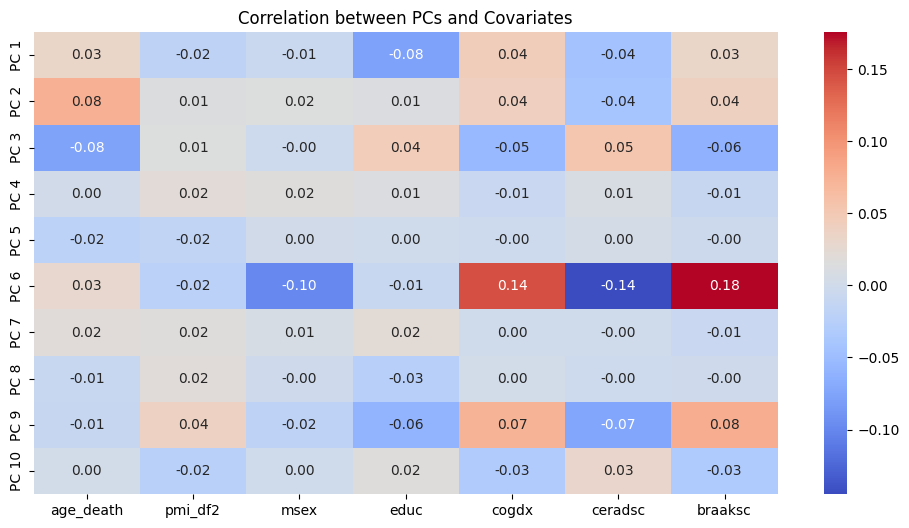

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=covariates_dataframe.columns,
            yticklabels=[f'PC {i+1}' for i in range(principal_components.shape[1])], ax=ax1)
ax1.set_title('Correlation between PCs and Covariates')

In [49]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=merged_data_clinical_pathological.columns)
print(loadings_df)

                         PC1       PC2       PC3       PC4       PC5  \
ensemble_gene_name                                                     
ENSG00000163463     0.001049 -0.002934  0.004109  0.000413 -0.000292   
ENSG00000163462     0.007016  0.000021 -0.001893 -0.000132 -0.001204   
ENSG00000185499     0.000160 -0.000155 -0.000401 -0.001043  0.000430   
ENSG00000169231     0.005109  0.005020  0.001255  0.002169 -0.001035   
ENSG00000261905     0.004033 -0.004559  0.010764  0.000891 -0.001687   
...                      ...       ...       ...       ...       ...   
ENSG00000198886     0.011342 -0.006207  0.027388  0.003835 -0.002184   
ENSG00000198786     0.011215 -0.000836  0.021986  0.001562  0.000366   
ENSG00000198695     0.003299 -0.001315  0.005838  0.000059 -0.000622   
ENSG00000198727     0.011811 -0.004210  0.029949  0.001794 -0.001750   
ENSG00000274847     0.001135 -0.002068 -0.000705  0.001845 -0.001088   

                         PC6       PC7       PC8       PC9     

In [53]:
loadings_df.to_csv('../../../../usman/Single_Cell_Microglia_Project/results/inhibitory_neuron/loadings_pca_output.csv')

In [96]:
def shuffle_column(column):
    np.random.shuffle(column)
    return column

def permutation_test_covariates(df):
    shuffled_df = df.copy()
    return shuffled_df.reindex(np.random.permutation(shuffled_df.index))

In [97]:
shuffled_covariates = permutation_test_covariates(covariates_dataframe)

In [98]:
shuffled_covariates

,age_death,pmi_df2,msex,educ,cogdx,ceradsc,braaksc
cell_id,,,,,,,
CATTGTTAGTATCCTG.6.9,84.216290,10.733333,1.0,14.0,1.0,4.0,2.0
GGAGGATTCCACACCT.14.4,82.713210,5.716667,1.0,19.0,4.0,1.0,3.0
CTCCGATTCGCCAGTG.22.9,86.587269,1.250000,1.0,25.0,4.0,1.0,1.0
GAGGCCTGTGGGATTG.25.10,90.000000,5.000000,0.0,11.0,4.0,1.0,4.0
GCATCTCAGTGCCGAA.21.6,90.000000,6.866667,0.0,7.0,4.0,1.0,5.0
...,...,...,...,...,...,...,...
GTGCACGTCGAATGCT.2.9,81.911020,3.916667,0.0,16.0,1.0,4.0,4.0
GGCACGTAGAGAGTGA.5.6,80.736482,6.000000,0.0,16.0,4.0,1.0,5.0
TGATCAGAGTTAGTAG.25.9,90.000000,4.166667,1.0,15.0,4.0,1.0,5.0


In [99]:
principal_components.T.shape

(10, 61667)

In [100]:

covariates_clinical_data_AD_NCI = covariates_dataframe
X_pca_expression = principal_components

li = [[[] for i in range(covariates_clinical_data_AD_NCI.T.shape[0])] for l in range(X_pca_expression.shape[1])]
for l in range(X_pca_expression.shape[1]):
    x = np.array(np.array(X_pca_expression.T[l]))
    for i in range(1000):
        shuffled_covariates = permutation_test_covariates(covariates_clinical_data_AD_NCI)
        
        for k,j in enumerate(range(shuffled_covariates.T.shape[0])):
            y = np.array(np.array(shuffled_covariates.T.iloc[j,]))
            corr = np.corrcoef(x,y)[0,1]
            li[l][k].append(corr)

In [101]:
li = np.array(li)
li = np.sort(np.abs(li), axis=1)
percentiles_90 = np.percentile(li, 90, axis=1)
percentiles_90


array([[0.00662549, 0.01017039, 0.00594471, ..., 0.00301107, 0.00385116,
        0.00759747],
       [0.00817778, 0.00619233, 0.00454291, ..., 0.00292302, 0.00657604,
        0.00828092],
       [0.00608114, 0.00309599, 0.00677586, ..., 0.00497589, 0.00450232,
        0.00538373],
       ...,
       [0.00630857, 0.00419316, 0.00313353, ..., 0.00429841, 0.00287835,
        0.00212136],
       [0.00456399, 0.00470891, 0.01004045, ..., 0.00542672, 0.00466258,
        0.0057585 ],
       [0.0047161 , 0.00238   , 0.00391778, ..., 0.00569032, 0.00284061,
        0.00433141]])

In [102]:
li_pc_fdr = []
for i in li:   
    li_ = np.array(i)
    li_ = np.sort(np.abs(li_), axis=1)
    percentiles_90 = np.percentile(li_, 90, axis=1)
    li_pc_fdr.append(list(percentiles_90))

In [103]:
np.array(li_pc_fdr).shape

(10, 7)

Text(0.5, 1.0, 'Correlation between PCs and Covariates')

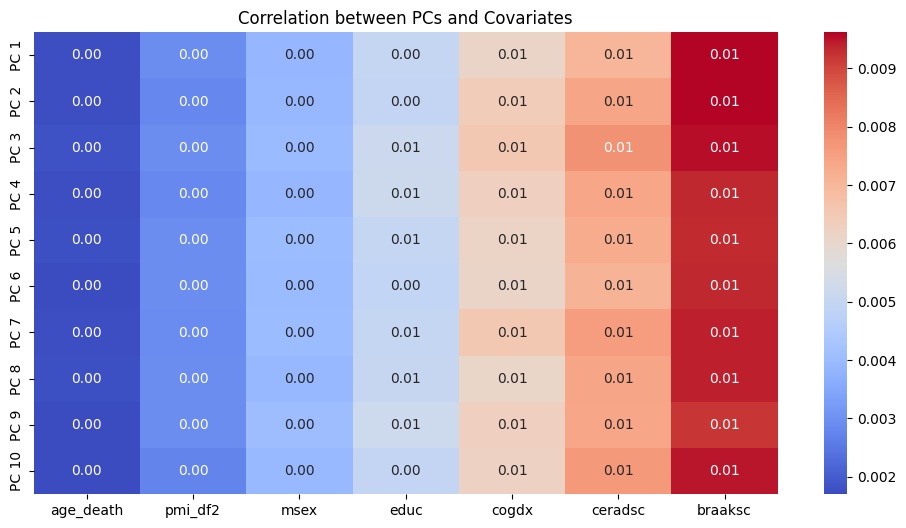

In [104]:
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.heatmap(np.array(li_pc_fdr), annot=True, cmap='coolwarm', fmt='.2f', xticklabels=covariates_clinical_data_AD_NCI.columns, yticklabels=[f'PC {i+1}' for i in range(X_pca_expression.shape[1])], ax=ax1)
ax1.set_title('Correlation between PCs and Covariates')

Text(0.5, 1.0, 'Correlation between PCs and Covariates')

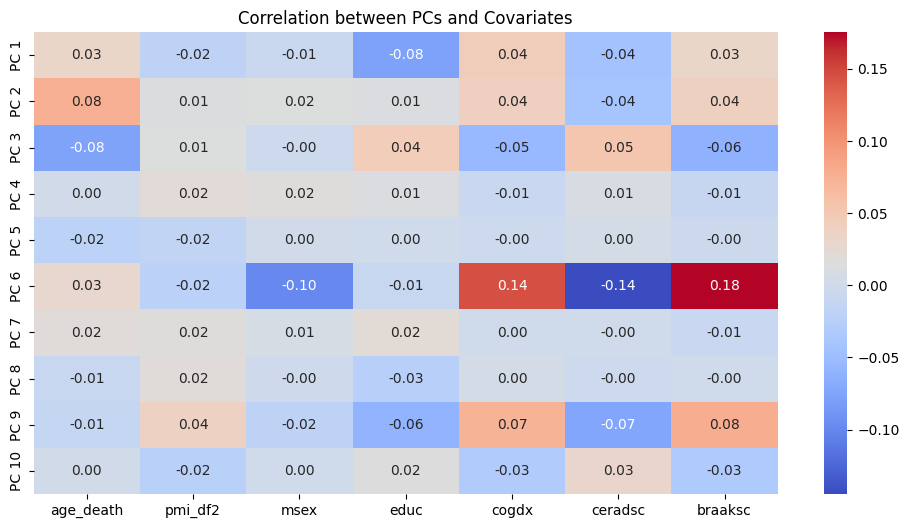

In [105]:
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=covariates_dataframe.columns,
            yticklabels=[f'PC {i+1}' for i in range(principal_components.shape[1])], ax=ax1)
ax1.set_title('Correlation between PCs and Covariates')